# Aprendizaje Automático - Práctica 2 - Complejidad de H y Modelos Lineales

#### Valoración máxima: 12 puntos (+1.5 puntos de Bonus)

#### Fecha límite de entrega: 7 de Mayo de 2023 a las 23:59

#### Entrega a través de https://pradogrado2223.ugr.es/

### Nombre completo: <mark>Yeray López Ramírez</mark>



---

Este trabajo, cuya puntuación máxima será de 12 puntos (+1.5 puntos de bonus), pretende servir como práctica y refuerzo de los conocimientos adquiridos en teoría, relativos a modelos lineales de clasificación.

Límite de entrega: **7 de Mayo de 2023 a las 23:59 (PRADO)**


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero .ipynb). No es necesario entregar ninguna memoria externa, pero el código debe estar bien comentado, y todas las decisiones tomadas y el trabajo desarrollado deben documentarse suficientemente en celdas de texto. 

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final, dado que es altamente improbable que se extienda la fecha de entrega.  

- Reiterar que es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también una valoración razonada sobre la calidad de los
resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado. 

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo. 

- El codigo NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook. 

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- El código debe estar obligatoriamente comentado explicando lo que realizan los distintos apartados y/o bloques.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: COMPLEJIDAD DE H Y EL RUIDO (4 puntos)</font>

<font color='blue'>En este ejercicio intentaremos profundizar un poco en la dificultad que introduce el ruido de las etiquetas en la elección de la clase de funciones más adecuada para resolver un determinado problema. 



In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Latex, Markdown

# Fijamos la semilla aleatoria
np.random.seed(1)

In [2]:
#Tamaño de fuente para las gráficas
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

<font color='blue'>Haremos uso de tres funciones, que se incluyen a continuación: 

<font color='blue'>$simula\_unif(N, dim, rango)$, que calcula una lista de $N$ vectores de dimensión $dim$. Cada vector contiene $dim$ números aleatorios uniformes en el intervalo $rango$.

In [3]:
def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

<font color='blue'>$simula\_gauss(N, dim, sigma)$, que calcula una lista de longitud $N$ de vectores de dimensión $dim$, donde cada posición del vector contiene un número aleatorio extraído de una distribucción Gaussiana de media 0 y varianza dada (para cada dimension, por la posición del vector $sigma$).

In [4]:
def simula_gauss(N, dim, sigma):
    media = 0    
    out = np.zeros((N,dim),np.float64)        
    for i in range(N):
        # Para cada columna dim se emplea un sigma determinado. Es decir, para 
        # la primera columna (eje X) se usará una N(0,sqrt(sigma[0])) 
        # y para la segunda (eje Y) N(0,sqrt(sigma[1]))
        out[i,:] = np.random.normal(loc=media, scale=np.sqrt(sigma), size=dim)
    
    return out

<font color='blue'>$simula\_recta(intervalo)$, que simula de forma aleatoria los parámetros $v = (a, b)$ de una
recta, $y = ax + b$, dado un determinado intervalo (dentro del cual se generan dos puntos aleatorios, que se emplearán para calcular la pendiente y el término independiente de la recta).

In [5]:
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Cálculo de la pendiente.
    b = y1 - a*x1       # Cálculo del termino independiente.
    
    return a, b

#### <font color='blue'>a)  (1 punto) Visualización de puntos iniciales.

<font color='blue'>Vamos a valorar la influencia del ruido en la selección de la clase de funciones y su complejidad. Con ayuda de la función $simula\_unif()$ generamos una
muestra de 100 puntos 2D, en el intervalo $[-50, 50]$,  a los que vamos añadir una etiqueta usando el signo de la función $f(x, y) = y - ax - b$, es decir el signo de la distancia de cada punto a la recta simulada con
$simula\_recta()$.

Dibujar un gráfico 2D con los puntos etiquetados. Dibuje también la recta usada para etiquetar. Observe y verifique (por medio del error de clasificación) que todos los puntos están bien clasificados respecto de la recta.
</font>


In [6]:
"""
np.sign(0) da 0 (véase https://numpy.org/doc/stable/reference/generated/numpy.sign.html), lo que, en ciertas ocasiones, puede ser problemático
Por ese motivo, proporcionamos esta sencilla función que devuelve el signo del valor que se le proporciona como entrada
Si esta función se emplea con un array, se obtendrá el error "ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"
Si quiere poder emplearse con arrays, bastaría vectorizarla:
		numeros = np.random.randint(-10,10,10)
		sgn = np.vectorize(signo)
		print(numeros)
		print(sgn(numeros))
"""
def signo(x):
	if x >= 0:
		return 1
	return -1

# Funcion de signo vectorizada, evalua los signos de un vector de valores
def v_signo(x):
	vfun = np.vectorize(signo)
	return vfun(x)

def f(x, y, a, b):
	return signo(y - a*x - b)

<font color='green'> Definimos las siguientes funciones:
- <font color='green'> *etiquetarDatosRecta* para obtener las etiquetas de los datos a partir de la función de la recta
- <font color='green'> *separarDatos* devuelve dos conjuntos de datos, los de etiqueta negativa y positiva
- <font color='green'> *missclassification* calcula el error en clasificación a partir de la etiqueta original y la predecida
- <font color='green'> *graficar_recta_con_puntos* imprime la nube de puntos separada por la recta que se pase como parámetro

In [7]:
def etiquetar_datos_recta(datos, a, b):
  """
  Etiqueta un conjunto de datos a partir de una recta.

  Parámetros:
  - datos: una lista de tuplas (x, y) que representan los puntos a etiquetar
  - a, b: dos números reales que definen la recta (y = ax + b)

  Returns:
  - etiquetas: un array de NumPy con las etiquetas (+1 o -1) para cada punto
  - puntos_1: un array con los puntos etiquetados como -1
  - puntos_2: un array con los puntos etiquetados como +1
  """

  return np.array([f(x, y, a, b) for x, y in datos])

def separar_datos(x, y):
  """
  Función que separa un conjunto de datos en dos listas según su etiqueta.

  Parámetros:
  - x: vector con los datos a separar.
  - y: vector con las etiquetas de los datos.

  Retorna:
  - d1: np.array con los puntos que tienen etiqueta -1.
  - d2: np.array con los puntos que tienen etiqueta 1.
  """
  d1 = np.array(x[y == -1]) # Guarda los datos con etiquetas negativas
  d2 = np.array(x[y == 1]) # Guarda los datos con etiquetas positivas

  return d1, d2
    
def missclassification(y, y_pred):
  """
  Función que calcula la cantidad de etiquetas incorrectamente clasificadas entre 
  dos vectores de etiquetas.
  
  Parámetros:
  - y: vector de etiquetas original.
  - y_: vector de etiquetas predecidas
  
  Returns:
  - Un entero que representa la cantidad de etiquetas mal clasificadas.
  """
  miss = 100*sum(y1 != y2 for y1, y2 in zip(y, y_pred))/y.size

  return miss

# Funcion para calcular el porcertaje de acierto de la clasificación
def pacierto(y, y_pred):
  """
  Función que calcula la cantidad de etiquetas correctamente clasificadas entre 
  dos vectores de etiquetas.
  
  Parámetros:
  - y: vector de etiquetas original.
  - y_: vector de etiquetas predecidas
  
  Returns:
  - Un entero que representa la cantidad de etiquetas bien clasificadas.
  """
  return 100-missclassification(y, y_pred)

# Muestra una separación de datos por etiquetas y una recta
def graficar_recta_con_puntos(x, y , a, b, titulo, intervalo):
  #Separar datos segun la etiqueta
  x1, x2 = separar_datos(x,y)
  
  # Generar valores de x para graficar la recta
  x_ = np.linspace(intervalo[0], intervalo[1], 2)

  # Calcular valores de la recta
  recta = (a * x_) + b
  # Graficar puntos
  plt.scatter(x1[:,0],x1[:,1],c='red',label="Sign -1")
  plt.scatter(x2[:,0],x2[:,1],c='green',label="Sign 1")

  # Graficar la recta
  plt.plot(x_, recta, c='tab:blue', linewidth=2)

  plt.title(titulo)
  plt.legend(loc='upper right')

  plt.xlim(intervalo[0],intervalo[1])
  plt.ylim(intervalo[0],intervalo[1])

  plt.show()

<font color='green'>Podemos observar como los datos se clasifican de forma correcta a la recta generada

Missclassifcation rate: 0.0 %


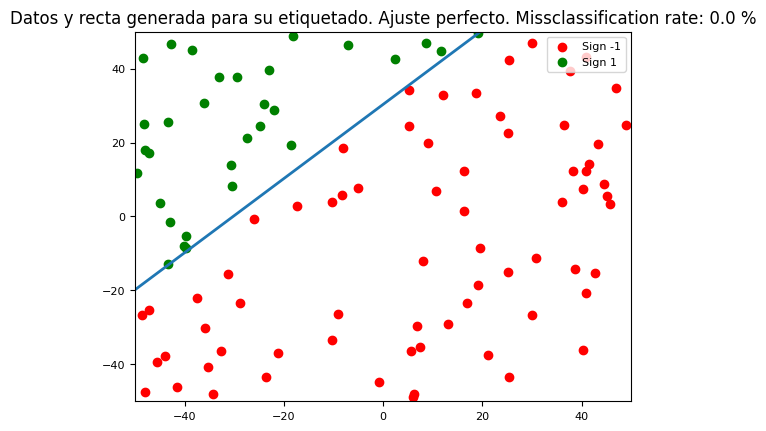

In [8]:
# Generar recta aleatoria
INTERVALO = [-50,50]
A,B = simula_recta(INTERVALO)

# Generar los 100 puntos aleatorios
X = simula_unif(INTERVALO[1]-INTERVALO[0], 2, INTERVALO)

# Etiquetar los puntos según la recta generada
Y = etiquetar_datos_recta(X, A, B)

# Calcular missclasification
miss = missclassification(Y, Y) #Da 0 ya que es el mismo
print("Missclassifcation rate: {:.1f} %".format(float(miss)))

# Graficar los puntos etiquetados correctamente
titulo = f"Datos y recta generada para su etiquetado. Ajuste perfecto. Missclassification rate: {float(miss)} %" # Missclassification rate: {:.1f} %".format(float(miss))"
X1, X2 = separar_datos(X,Y)
graficar_recta_con_puntos(X, Y, A, B, titulo, INTERVALO)

plt.show()

#### <font color='blue'>b) (0.5 puntos)  Introducción de ruido. 
Modifique de forma aleatoria un 10\% de las etiquetas positivas y otro
10\% de las negativas y guarde los puntos con sus nuevas etiquetas. Dibuje de nuevo
la gráfica anterior. Ahora habrá puntos mal clasificados respecto de la recta.</font>


<font color='green'> Rescatamos la función de introducir ruido de la práctica anterior y la modificamos para que introduzca el mismo ruido tanto en las etiquetas negativas como en las positivas.

<font color='green'>Al dibujar nuevamente la gráfica observamos que el error en clasificación es del 10%, el mismo porcentaje que del ruido introducido. 

Misaclassifcation rate: 10.0 %


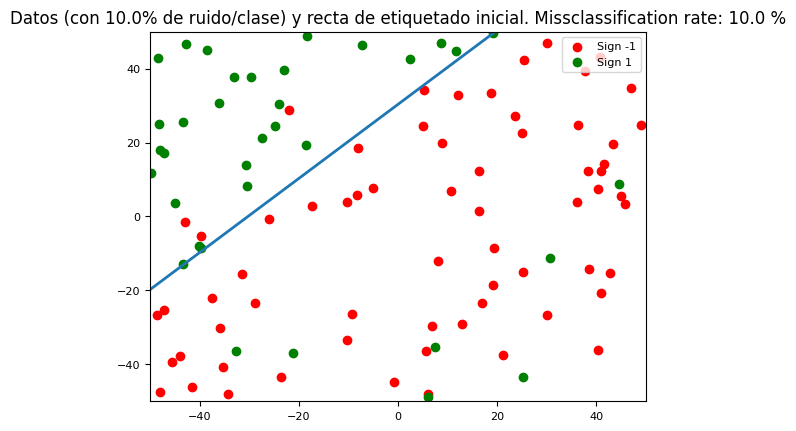

In [9]:
def introducir_ruido(y,porcent_ruido):
    """
    Función que introduce ruido en un conjunto de etiquetas.

    Parámetros:

    y: array de numpy con las etiquetas originales
    porcent_ruido: porcentaje de ruido a introducir (valor entre 0 y 1)
    Retorna:

    y_: array de numpy con las nuevas etiquetas con ruido
    """
    y_ = y.copy()

    # Obtener los índices de las etiquetas positivas y negativas
    negativas_idx = np.where(y_ == -1)[0]
    positivas_idx = np.where(y_ == 1)[0]

    # Mezclar los índices
    np.random.shuffle(negativas_idx)
    np.random.shuffle(positivas_idx)

    # Cambiar el valor de etiqueta en el 10% de los indices negativos
    for i in range(round(len(negativas_idx)*porcent_ruido)):
      y_[negativas_idx[i]] = -y_[negativas_idx[i]]

    # Cambiar el valor de etiqueta en el 10% de los indices positivos
    for i in range(round(len(positivas_idx)*porcent_ruido)):
      y_[positivas_idx[i]] = -y_[positivas_idx[i]]

    return y_

porcentaje_ruido = 0.10

# Introducir ruido
Y_ruido = introducir_ruido(Y, porcentaje_ruido)

#Calcular miss
miss = missclassification(Y, Y_ruido)
print("Misaclassifcation rate: {:.1f} %".format(float(miss)))

# Graficar los puntos y la recta
titulo = f"Datos (con {porcentaje_ruido*100}% de ruido/clase) y recta de etiquetado inicial. Missclassification rate: {float(miss)} %" # Missclassification rate: {:.1f} %".format(float(miss))"
graficar_recta_con_puntos(X, Y_ruido, A, B, titulo, INTERVALO)

plt.show()


#### <font color='blue'>c) (2.5 puntos)  Análisis y comparación de distintas fronteras de decisión. 
Supongamos ahora que las siguientes funciones definen la frontera de
clasificación de los puntos de la muestra en lugar de una recta.</font>

<font color='blue'>$f_1(x, y) = (x - 10)^2 + (y - 20)^2 - 400$</font>

<font color='blue'>$f_2(x, y) = 0.5(x + 10)^2 + (y - 20)^2 - 400$</font>

<font color='blue'>$f_3(x, y) = 0.5(x - 10)^2 - (y + 20)^2 - 400$</font>

<font color='blue'>$f_4(x, y) = y - 20x^2 - 5x + 3$</font>


<font color='blue'>

Visualizar el etiquetado generado en el Apartado (b) junto con la gráfica de cada
una de las funciones. Muéstrense los porcentajes de acierto en clasificación para las funciones (es decir, fronteras de decisión) evaluadas. Argumente si estas funciones más
complejas son mejores clasificadores que la función lineal. Observe las gráficas y diga
qué consecuencias extrae sobre la influencia de la modificación de etiquetas
en el proceso de aprendizaje. En concreto, razone sobre cuestiones como las siguientes: ¿Necesariamente funciones más complejas son mejores clasificadores (es decir, representan “mejores” bordes de decisión)? ¿Es posible superar/mejorar ese 10% de error de clasificación? ¿Qué pasa si repetimos el proceso con estas funciones más complejas (las empleamos para etiquetar los datos y luego metemos un 10% de ruido)? ¿Qué error de clasificación tenemos? ¿Es menor que ese 10%?
</font>



<font color='green'>Las ejecuciones anteriores muestran como una recta es suficiente para dividir los datos correctamente siempre y cuando sean linealmente separables. 

<font color='green'>Al usar funciones más complejas sobre los datos (recordemos que sean linealmente separables) vemos que no solo NO mejora sino que empeora el resultado. Lo podemos observar al comparar el porcentaje de error en clasificación de la recta vs el porcentaje de acierto (100 - perror):
- <font color='green'>El círculo y la elipse no pasan del 50% de acierto, o lo que es igual, un porcentaje de error de más del 50%
- <font color='green'>Las parábolas pasan del 50% pero siguen sin estar siquiera cerca del 90% de acierto.

<font color='green'>Podemos concluir que no siempre es mejor funciones más complejas, elegir entre una u otra dependerá de los datos que se usen y como estén etiquetados.

<font color='green'>Con una función lo suficientemente compleja se podría mejorar el 10% de error, incluso llegar al 0%. El problema es que esa función sería terrible generalizando ya que está sobreajustando a los datos por lo que no es práctico usar una función demasiado compleja.

<font color='green'>Si usamos las funciones definidas para etiquetar los datos y luego introducimos el ruido vemos que el resultado es el mismo que con la recta. El porcentaje de error sigue siendo de un 10% y no baja ni sube de ahí.

In [10]:
"""
Esta función permite visualizar las fronteras de decisión.

Entradas: 
- X: datos de entrada con tantas filas como ejemplos, y tantas columnas como dimensiones/features
- y: etiquetas
- fz: función que define la frontera de decisión
- title: título que se le quiere poner a la figura
- xaxis: nombre que se le quiere poner al eje X
- yaxis: nombre que se le quiere poner al eje Y

Salida: visualización de los datos junto con la frontera de decisión proporcionada

Ejemplo de uso: 
def f_prueba(X):
	return X[:,0]**2 + X[:,1]**2 - 200
plot_datos_cuad(X, y, f_prueba, title=r'$f_{prueba}(x, y) = x^2 + y^2 - 200$')
"""
def plot_datos_cuad(X, y, fz, title='Point cloud plot', xaxis='x axis', yaxis='y axis'):
    #Preparar datos
    min_xy = X.min(axis=0)
    max_xy = X.max(axis=0)
    border_xy = (max_xy-min_xy)*0.01
    
    #Generar grid de predicciones
    # np.mgrid es una versión multidimensional de meshgrid (https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html)
    xx, yy = np.mgrid[min_xy[0]-border_xy[0]:max_xy[0]+border_xy[0]+0.001:border_xy[0], 
                      min_xy[1]-border_xy[1]:max_xy[1]+border_xy[1]+0.001:border_xy[1]]
    # np.ravel "aplana" un array (https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)
    # Diferencias entre ravel y flatten: https://stackoverflow.com/questions/28930465/what-is-the-difference-between-flatten-and-ravel-functions-in-numpy
    # np.c_ permite concatenar arrays a lo largo del segundo eje (https://numpy.org/doc/stable/reference/generated/numpy.c_.html)
    grid = np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx).ravel()]
    pred_y = np.sign(fz(grid)).reshape(xx.shape)
    
    #Plot
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, pred_y, 50, cmap='RdBu',vmin=-1, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label('$f(x, y)$')
    ax_c.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, linewidth=1, 
                cmap="RdYlBu", edgecolor='white')
    
    XX, YY = np.meshgrid(np.linspace(round(min(min_xy)), round(max(max_xy)),X.shape[0]),np.linspace(round(min(min_xy)), round(max(max_xy)),X.shape[0]))
    positions = np.vstack([XX.ravel(), YY.ravel()])
    # ax.contour(XX,YY,fz(positions.T).reshape(X.shape[0],X.shape[0]),[0], colors='white')
    
    ax.set(
       xlim=(min_xy[0]-border_xy[0], max_xy[0]+border_xy[0]), 
       ylim=(min_xy[1]-border_xy[1], max_xy[1]+border_xy[1]),
       xlabel=xaxis, ylabel=yaxis)
    plt.title(title)
    plt.show()

In [11]:
# Funciones a evaluar
#########################################################################
def f_1(X):
    """f1(x, y) = (x − 10)^2 + (y − 20)^2 − 400"""
    return (X[:, 0] - 10) ** 2 + (X[:, 1] - 20) ** 2 - 400

def f_2(X):
    """f2(x, y) = 0.5·(x + 10)^2 + (y − 20)^2 − 400"""
    return 0.5 * (X[:, 0] + 10) ** 2 + (X[:, 1] - 20) ** 2 - 400

def f_3(X):
    """f3(x, y) = 0.5·(x − 10)^2 − (y + 20)^2 − 400"""
    return 0.5 * (X[:, 0] - 10) ** 2 - (X[:, 1] + 20) ** 2 - 400

def f_4(X):
    """f4(x, y) = y − 20·x^2 − 5·x + 3"""
    return X[:, 1] - (20 * X[:, 0] ** 2)  - 5 * X[:, 0]  + 3
##########################################################################

Porcentaje de acierto: 47.0%


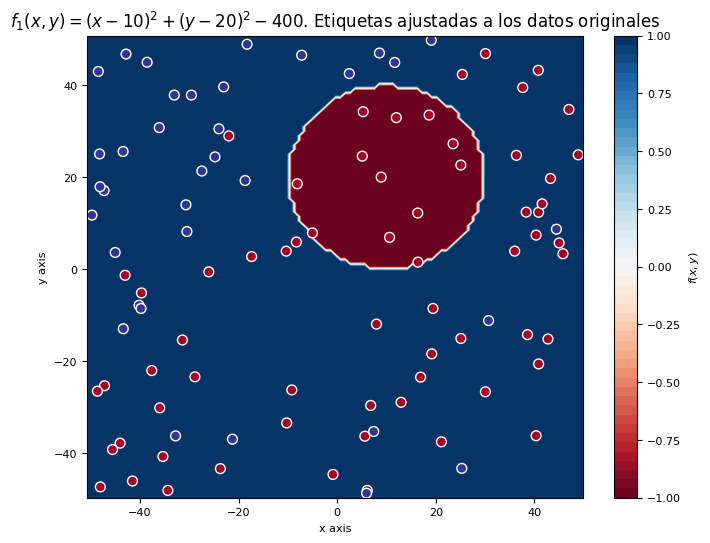

Porcentaje de acierto: 39.0%


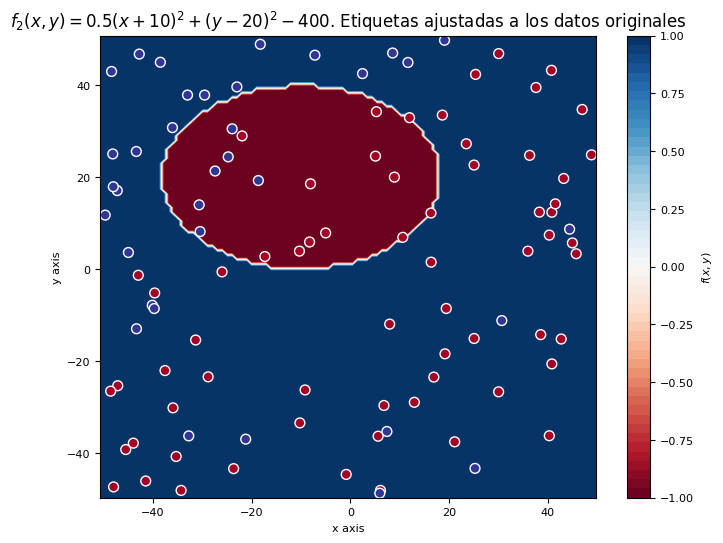

Porcentaje de acierto: 56.0%


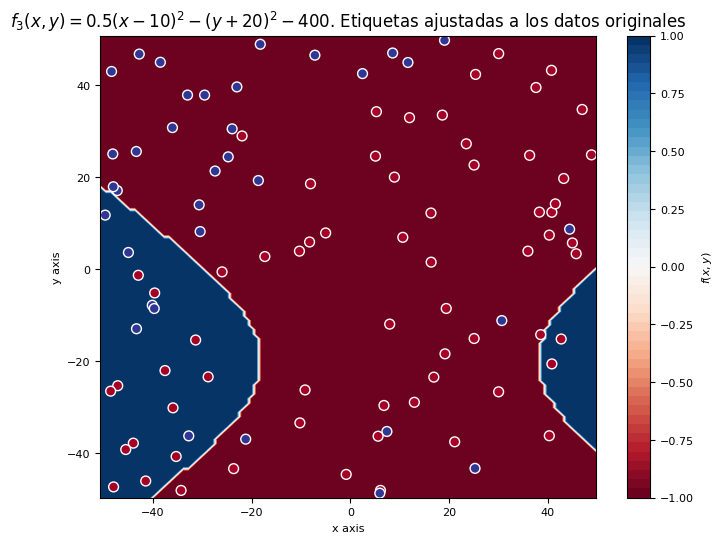

Porcentaje de acierto: 65.0%


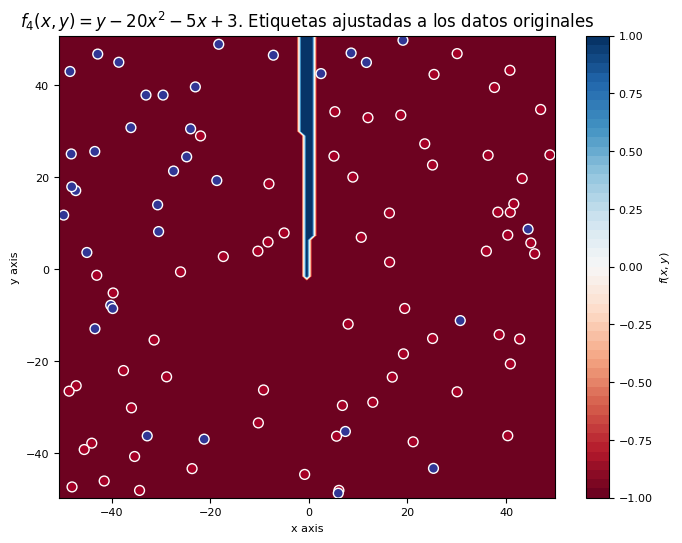

Porcentaje de acierto: 90.0%


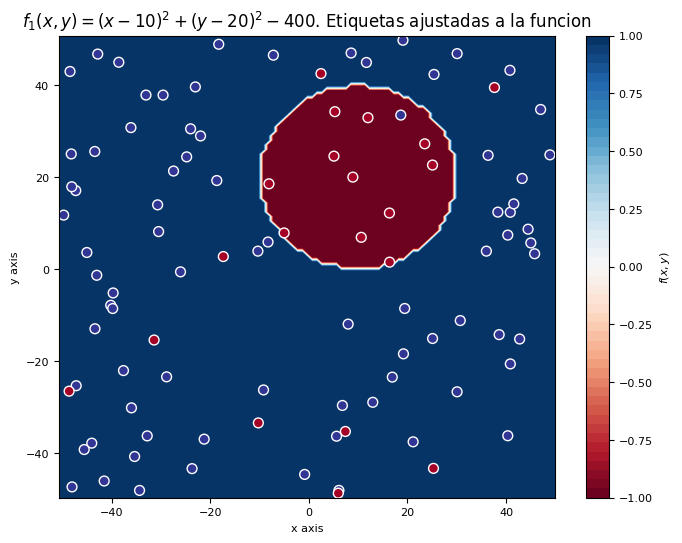

Porcentaje de acierto: 90.0%


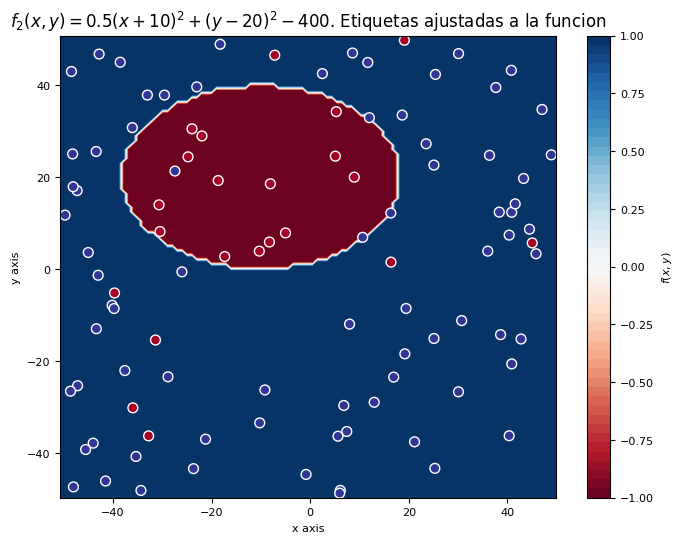

Porcentaje de acierto: 90.0%


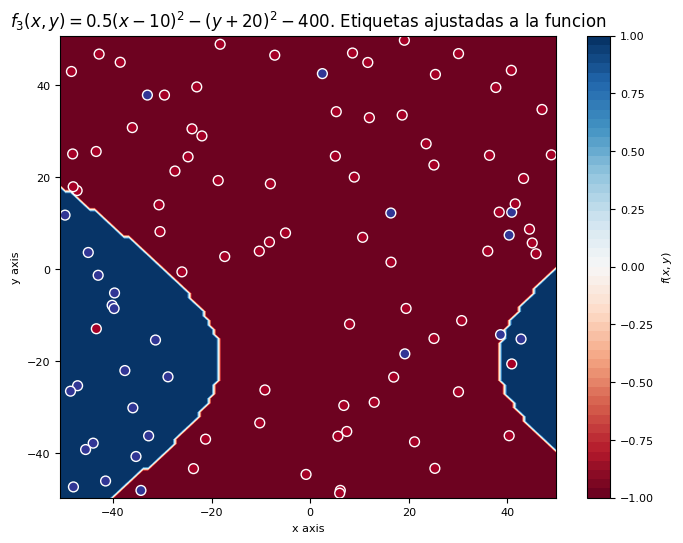

Porcentaje de acierto: 90.0%


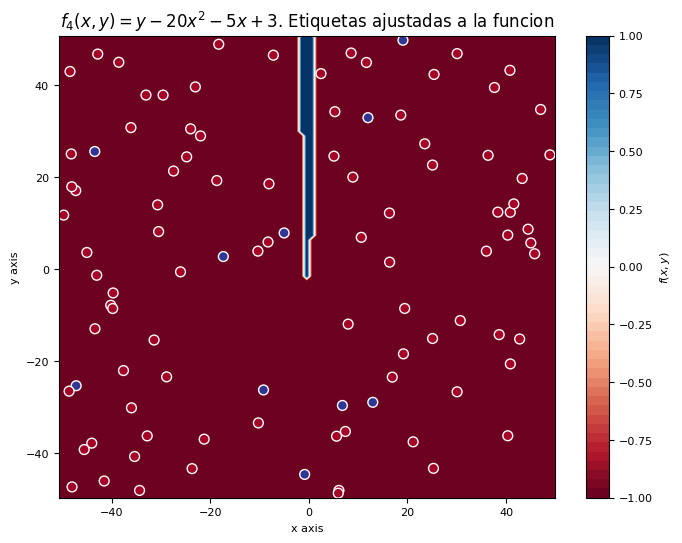

In [12]:
# Se usarán los mismos datos creados, N
lista_funciones = [f_1, f_2, f_3, f_4]
nombre_funciones = ["$f_1(x, y) = (x - 10)^2 + (y - 20)^2 - 400$",
                    "$f_2(x, y) = 0.5(x + 10)^2 + (y - 20)^2 - 400$",
                    "$f_3(x, y) = 0.5(x - 10)^2 - (y + 20)^2 - 400$",
                    "$f_4(x, y) = y - 20x^2 - 5x + 3$"]
i = 0
N=100

for fun in lista_funciones:

  # Uso de la función fn
  x_f = fun(X)

  # Calcular las etiquetas en base a la funcion
  y_f = v_signo(x_f)

  # Calcular porcentaje de acierto
  PA_rate = pacierto(Y_ruido, y_f)

  titulo = nombre_funciones[i] + ". Etiquetas ajustadas a los datos originales"
  i += 1

  print('Porcentaje de acierto: {}%'.format(PA_rate))

  # Graficar
  plot_datos_cuad(X, Y_ruido, fun, titulo)

# Se usarán los datos ajustados a cada funcion, N
i = 0
for fun in lista_funciones:

  # Uso de la función fn
  x_f = fun(X)
  # Calcular las etiquetas en base a la funcion
  y_f = v_signo(x_f)

  y_f_ruido = introducir_ruido(y_f, 0.10)

  # Calcular el porcentaje de acierto
  PA_rate = pacierto(y_f, y_f_ruido)

  titulo = nombre_funciones[i] + ". Etiquetas ajustadas a la funcion"
  i += 1

  print('Porcentaje de acierto: {}%'.format(PA_rate))

  # Graficar
  plot_datos_cuad(X, y_f_ruido, fun, titulo)

## <font color='blue'>Ejercicio 2: MODELOS LINEALES (8 puntos) </font>

### <font color='blue'>Apartado 2.1 (3 puntos) Algoritmo Perceptrón (PLA). 

<font color='blue'>Implementar la función $ajusta\_PLA(datos, label, max\_iter, vini)$ que calcula el hiperplano solución a un problema de clasificación binaria usando el algoritmo PLA. La entrada $datos$ es una matriz donde cada ejemplo está representado por una fila de la matriz, $label$ el vector de etiquetas (cada etiqueta es
un valor +1 o -1), $max\_iter$ es el número máximo de iteraciones permitidas y $vini$
el valor inicial del vector. La función devuelve, como mínimo, los coeficientes del hiperplano y la iteración de convergencia.  </font>



In [13]:
def ajusta_PLA(datos, etiqueta, max_iter, vini):
    """
    El perceptron solo termina cuando todas las etiquetas están correctas
    No obstante, como es posible que alguna vez no converga, se añade como
    criterio de parada el número de iteraciones

    Se actualiza w cada vez que no coincide la etiqueta predicha con su etiqueta
    """
    err = True # Controla el error
    iter = 0 # Contador de iteraciones
    
    w = np.copy(vini)
    
    while err and iter < max_iter:
        err = False
        
        for x in range(len(datos)):
            # wTx
            if(signo(np.transpose(w)@datos[x]) != etiqueta[x]):
                w = w + etiqueta[x]*datos[x]
                err = True # Con que una etiqueta falle, es suficiente para seguir el bucle
                iter += 1
            # Para si se pasa de iteraciones
            if(iter >= max_iter):
              break
    
    return w, iter

<font color='blue'>Ejecutar el algoritmo PLA con los datos empleados en el Apartado (a) del Ejercicio 1. Inicializar el algoritmo con: 

<font color='blue'>i) el vector cero y, 

<font color='blue'>ii) con vectores de
números aleatorios en [0, 1] (10 veces). 

<font color='blue'>Anotar el número medio de iteraciones
necesarias en ambos para converger. Se deben mostrar en una tabla cada uno de los pesos iniciales empleados, los finales (obtenidos tras el proceso de entrenamiento), y el porcentaje de error de clasificación. También se debe visualizar una nube de puntos etiquetada junto con la frontera resultante del ajuste. Valorar el resultado relacionando el punto
de inicio con el número de iteraciones. </font>

<font color='green'>Como durante la realización de las pruebas no se ha apreciado que alcance el número de iteraciones máximo, se ha estimado que 2500 iteraciones es un buen valor de parada para la resolución de este apartado.

<font color='green'>La media de iteraciones eligiendo vectores aleatorios en un rango [0,1] es de 2000, mientras que con el vector zero realiza 799 iteraciones. 

<font color='green'>La diferencia es notable, sin embargo, si atendemos a los resultados de forma individual, destaca el caso de la Iteracion 6 (5 en la tabla) ya que en este caso el número de iteraciones realizadas es de solo 775 frente a las 2000 del resto.

<font color='green'>Esto demuestra que sin duda alguna, el punto de partida afectará a la resolución
y aplicación del algoritmo. Se puede estimar que dependiendo de los valores de los puntos iniciales se va a encontrar más cerca de un plano u otro.

<font color='green'>Otra causa demostrada en la ejecución del algoritmo es que un buen punto de
partida es decisivo a la hora de conseguir un buen resultado en la convergencia, ya que el número de épocas que se ejecutan hasta converger puede ser mucho menor.

## APARTADO i: vector zero

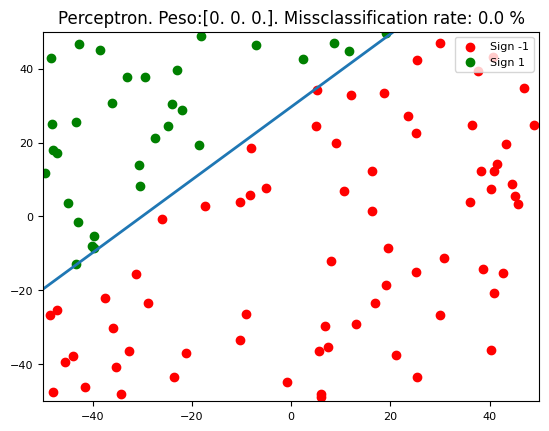

Peso Inicial              Peso Final  Missclasification  Iteraciones
0  [0.0, 0.0, 0.0]  [-587.0, -19.5, 19.79]                0.0          799

Peso Medio Inicial        Peso Medio Final  Media Missclasification  \
0    [0.0, 0.0, 0.0]  [-587.0, -19.5, 19.79]                      0.0   

   Media Iteraciones  
0              799.0

## APARTADO ii: 10 vectores aleatorios

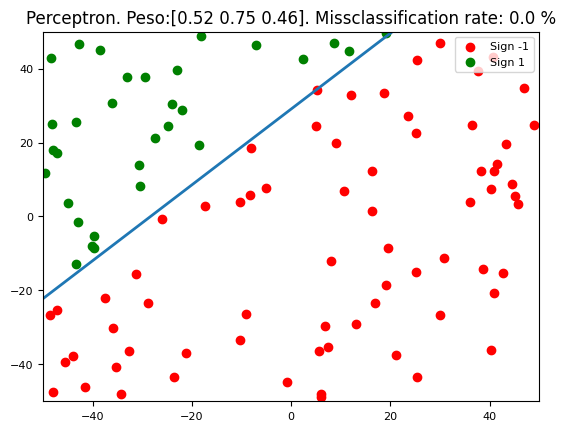

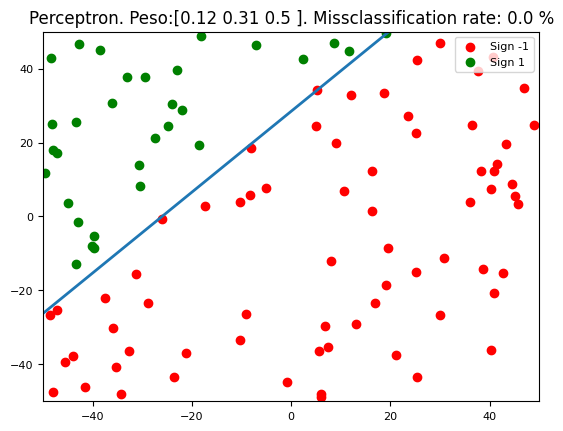

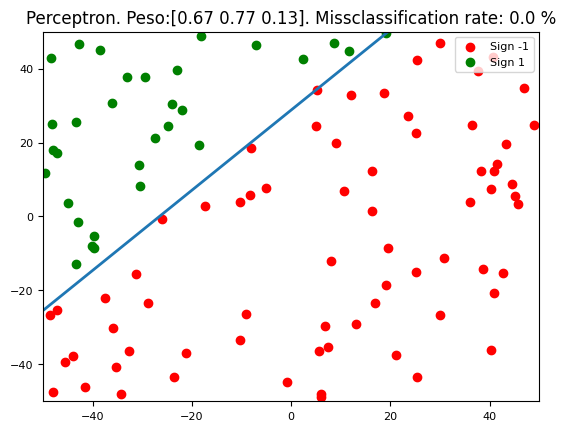

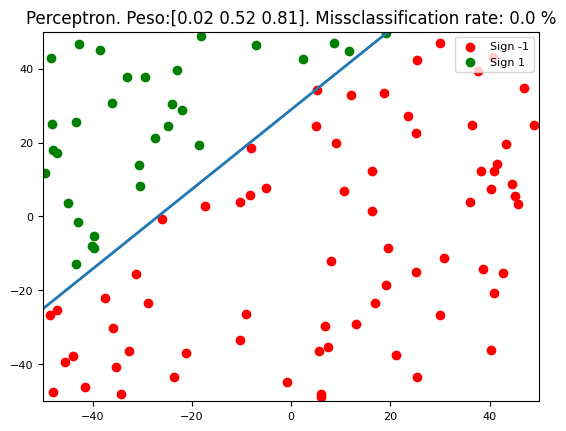

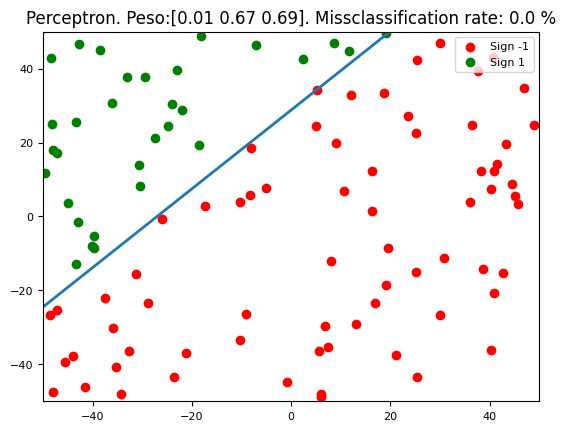

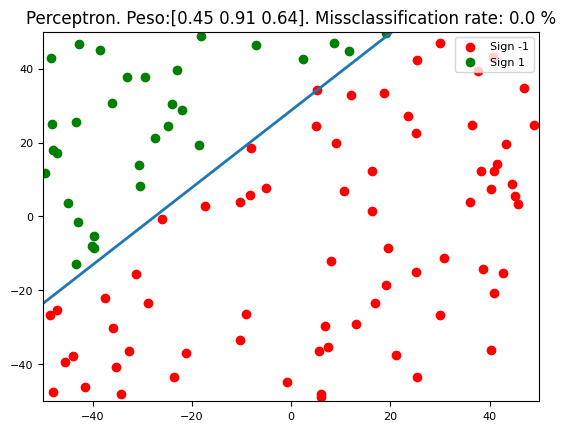

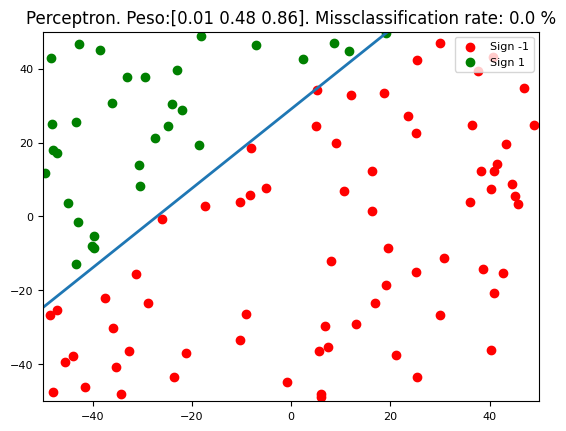

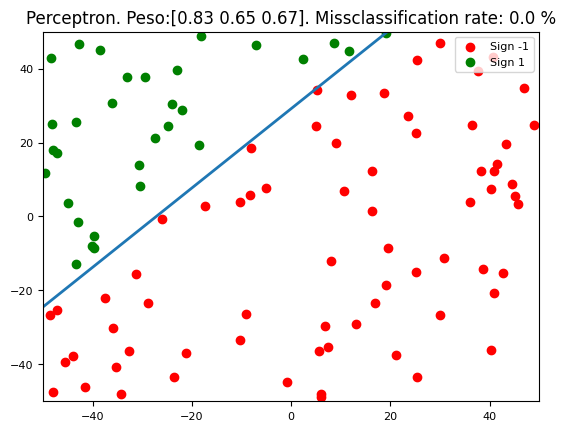

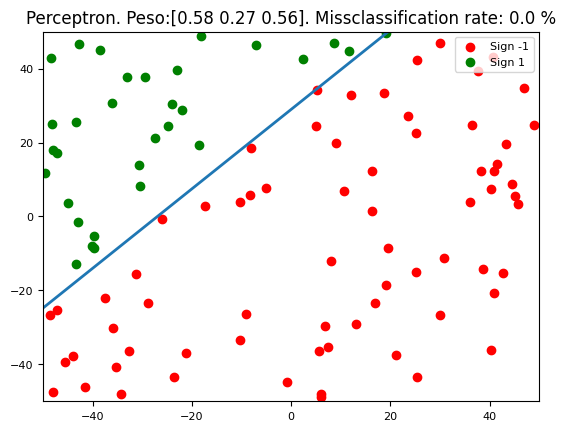

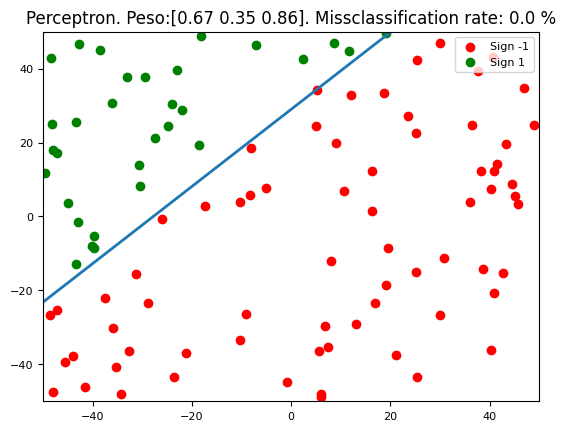

Peso Inicial                 Peso Final  Missclasification  \
0  [0.52, 0.75, 0.46]   [-1191.48, -42.0, 40.97]                0.0   
1   [0.12, 0.31, 0.5]  [-1373.88, -52.75, 48.26]                0.0   
2  [0.67, 0.77, 0.13]  [-1202.33, -45.24, 41.73]                0.0   
3  [0.02, 0.52, 0.81]  [-1106.98, -41.21, 38.26]                0.0   
4  [0.01, 0.67, 0.69]  [-1089.99, -40.29, 37.83]                0.0   
5  [0.45, 0.91, 0.64]   [-580.55, -21.11, 20.22]                0.0   
6  [0.01, 0.48, 0.86]  [-1163.99, -42.95, 40.02]                0.0   
7  [0.83, 0.65, 0.67]   [-1214.17, -44.61, 41.6]                0.0   
8  [0.58, 0.27, 0.56]  [-1255.42, -46.53, 43.32]                0.0   
9  [0.67, 0.35, 0.86]  [-1131.33, -40.68, 39.01]                0.0   

   Iteraciones  
0         2094  
1         2724  
2         2183  
3         1849  
4         1866  
5          775  
6         2020  
7         2247  
8         2342  
9         1958

Peso Medio Inicial           Peso Medio Final  Media Missclasification  \
0  [0.39, 0.57, 0.62]  [-1131.01, -41.74, 39.12]                      0.0   

   Media Iteraciones  
0             2005.8

In [14]:
MAX_ITERS = 150000
resultados = []

def experimentarPLA(v, y, show_graph=True):
  """
  Realiza un experimento PLA con los datos de entrada.

  Parámetros:
  v (float): Peso utilizado en el experimento.
  y (numpy.ndarray): Vector de etiquetas.
  show_graph (bool, opcional): Indica si se muestra el gráfico resultante. Por defecto es True.

  Retorna:
  No devuelve nada, sino que añade el resultado del experimento en la tupla resultados y 
  """
  X_ones_100 = np.c_[np.ones(100), X]

  # Calculamos los pesos
  w, iters = ajusta_PLA(X_ones_100, y, MAX_ITERS, v)
  a, b = -w[1]/w[2], -w[0]/w[2]

  # Etiquetar los puntos según la recta generada
  y_f = etiquetar_datos_recta(X, a, b)

  # Calcular missclasification
  miss = missclassification(y, y_f)

  # Guardamos el resultado
  resultados.append([v, w, miss, iters])

  # Graficar los puntos etiquetados correctamente
  titulo = f"Perceptron. Peso:{np.round(v, decimals=2)}. Missclassification rate: {float(miss)} %"
  if(show_graph):
    graficar_recta_con_puntos(X, y, a, b, titulo, INTERVALO)

def generarTablas(columnas, columnasMedias, generarMedia = True):
  # Creamos un dataframe con los resultados
  df_resultados = pd.DataFrame(resultados, columns=columnas)
  df_resultados = df_resultados.applymap(lambda x: np.round(x, 2))

  display(df_resultados)

  # Creamos un dataframe con los resultados medios
  if generarMedia:
    resultados_medios = [np.mean(np.array(resultados, dtype=object), axis=0)] # Media de resultados
    df_resultados_medios = pd.DataFrame(resultados_medios, columns=columnasMedias) # Creamos df
    df_resultados_medios = df_resultados_medios.applymap(lambda x: np.round(x, 2)) # Redondeo
    
    display(df_resultados_medios)

def generarTablasMedias(columnasMedias, resultados, resultados_medios = [], calcularMedia = True):
  if calcularMedia:
    resultados_medios = [np.mean(np.array(resultados, dtype=object), axis=0)] # Media de resultados

  df_resultados_medios = pd.DataFrame(resultados_medios, columns=columnasMedias) # Creamos df
  df_resultados_medios = df_resultados_medios.applymap(lambda x: np.round(x, 2)) # Redondeo
  
  display(df_resultados_medios)

# i) VECTOR A 0
labelDatos = ['Peso Inicial', 'Peso Final', 'Missclasification', 'Iteraciones']
labelDatosMedios = ['Peso Medio Inicial', 'Peso Medio Final', 'Media Missclasification', 'Media Iteraciones']

display(Markdown("## APARTADO i: vector zero"))
v_zero = np.array([0.0,0.0,0.0])
experimentarPLA(v_zero, Y)
generarTablas(labelDatos, labelDatosMedios, True)

# ii) VECTORES ALEATORIOS
display(Markdown("## APARTADO ii: 10 vectores aleatorios"))
N = 10
resultados = []
for i in range(N):
    # Genera el vector aleatorio
    vr = np.random.rand(3)
    experimentarPLA(vr, Y)
generarTablas(labelDatos, labelDatosMedios)

<font color='blue'>Ahora, hay que hacer lo mismo usando  los datos del Apartado (b) del Ejercicio 1, y $150.000$ como número máximo de iteraciones. ¿Se observa algún comportamiento diferente? En caso afirmativo, diga cuál y las
razones para que ello ocurra. </font>

<font color='green'>Podemos apreciar que con tan solo añadir un 10% de ruido, al algoritmo le resulta imposible aprender a separar el modelo. Siempre acaba llegando al máximo número de iteraciones, sin importa cual sea su valor. La recta resultante flutua demasiado en cada iteración llegando a modificarse completamente de una iteración a otra.

<font color='green'>Esto ocurre porque cuando los datos tienen ruido, éstos dejan de ser linealmente separables y no es posible encontrar un hiperplano que los separe correctamente. Por tanto, el Algoritmo Perceptrón no es capaz de clasificar todos los datos con una recta, pues no existe dicha recta.

<font color='green'> En el bonus se puede ver una modificación del perceptrón. El PLA pocket que guarda el peso con menor error de cada iteración.

Número máximo de iteraciones para todos los vectores:  150000 



## APARTADO i: vector a 0

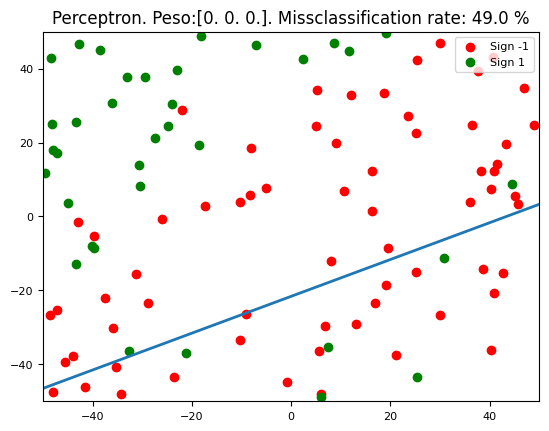

Peso Inicial               Peso Final  Missclasification  Iteraciones
0  [0.0, 0.0, 0.0]  [-660.0, 15.21, -30.56]               49.0       150000

Peso Medio Inicial         Peso Medio Final  Media Missclasification  \
0    [0.0, 0.0, 0.0]  [-660.0, 15.21, -30.56]                     49.0   

   Media Iteraciones  
0           150000.0

## APARTADO ii: 10 vectores aleatorios

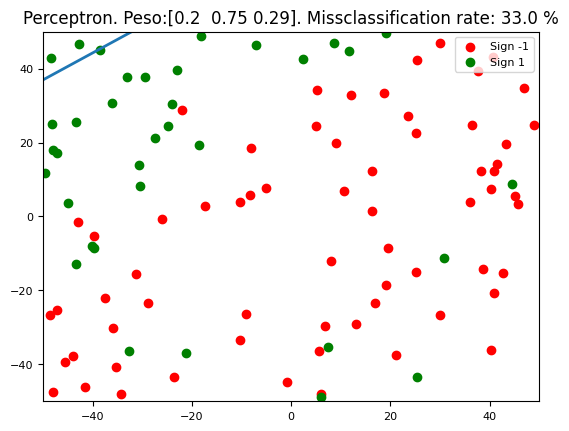

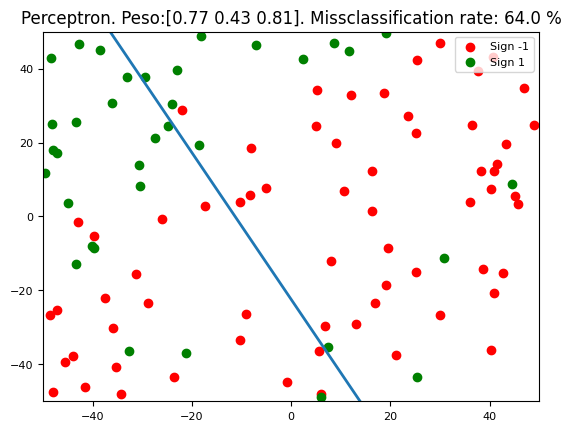

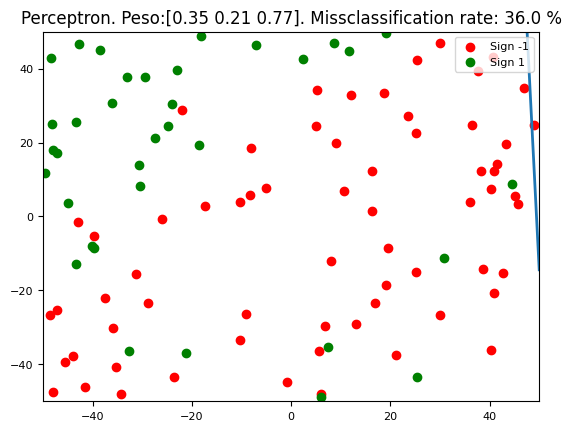

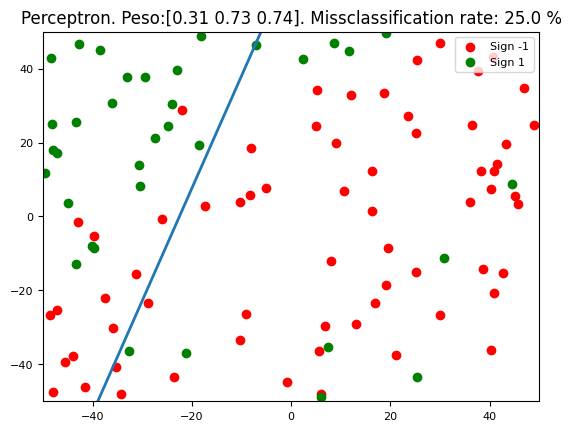

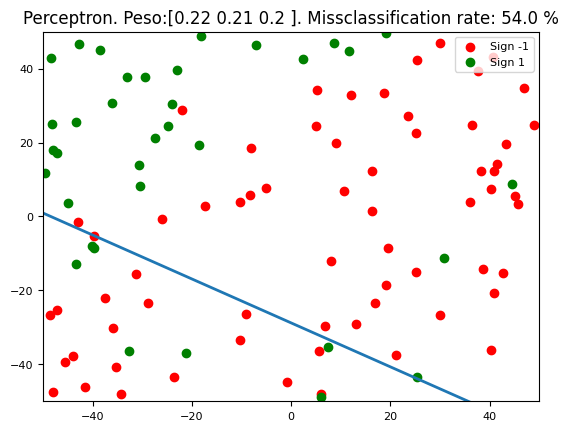

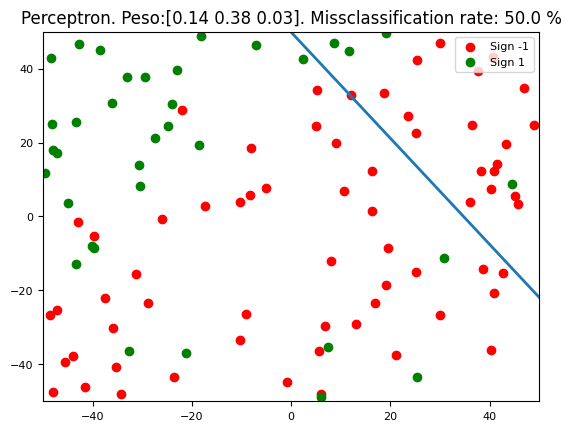

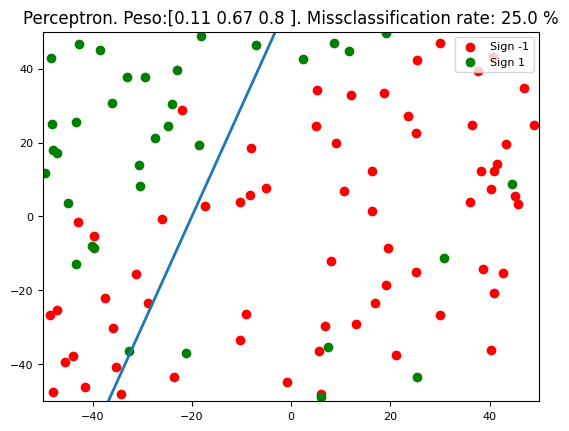

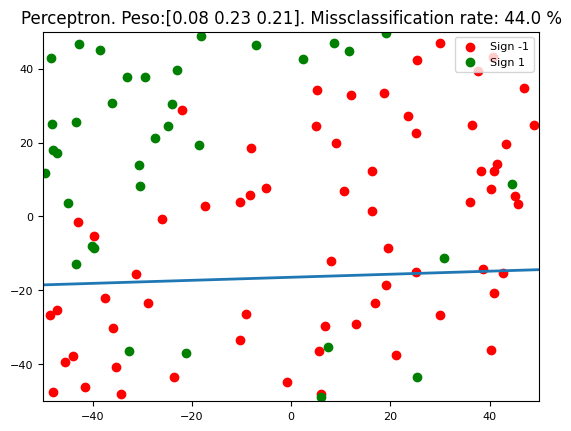

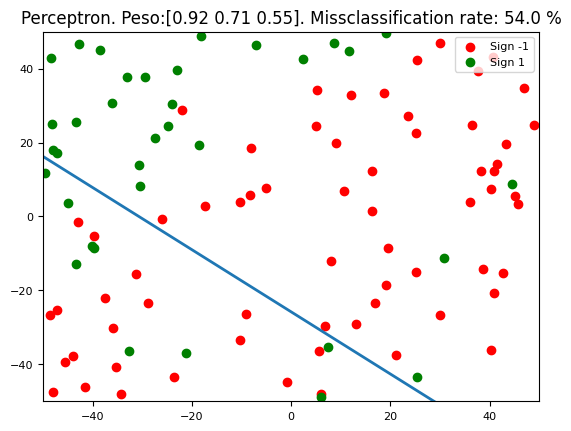

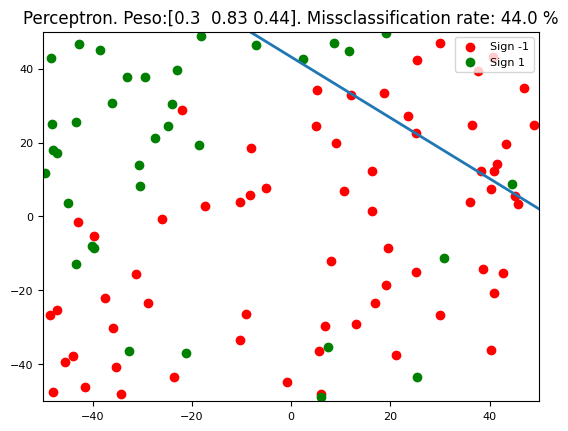

Peso Inicial                 Peso Final  Missclasification  \
0   [0.2, 0.75, 0.29]      [-671.8, -6.67, 9.15]               33.0   
1  [0.77, 0.43, 0.81]  [-689.23, -60.91, -30.69]               64.0   
2  [0.35, 0.21, 0.77]     [-675.65, 13.66, 0.52]               36.0   
3  [0.31, 0.73, 0.74]    [-681.69, -30.24, 9.95]               25.0   
4   [0.22, 0.21, 0.2]  [-683.78, -14.11, -23.74]               54.0   
5  [0.14, 0.38, 0.03]    [-685.86, 19.74, 13.76]               50.0   
6   [0.11, 0.67, 0.8]   [-687.89, -34.33, 11.57]               25.0   
7  [0.08, 0.23, 0.21]    [-673.92, 1.69, -40.97]               44.0   
8  [0.92, 0.71, 0.55]  [-673.08, -21.91, -26.07]               54.0   
9   [0.3, 0.83, 0.44]     [-679.7, 12.96, 15.75]               44.0   

   Iteraciones  
0       150000  
1       150000  
2       150000  
3       150000  
4       150000  
5       150000  
6       150000  
7       150000  
8       150000  
9       150000

Peso Medio Inicial          Peso Medio Final  Media Missclasification  \
0  [0.34, 0.52, 0.48]  [-680.26, -12.01, -6.08]                     42.9   

   Media Iteraciones  
0           150000.0

In [15]:
MAX_ITERS = 150000
resultados = []

print("Número máximo de iteraciones para todos los vectores: ", MAX_ITERS, "\n")

# i) VECTOR A 0
display(Markdown("## APARTADO i: vector a 0"))
v_zero = np.array([0.0,0.0,0.0])
experimentarPLA(v_zero, Y_ruido)
generarTablas(labelDatos, labelDatosMedios)

# ii) VECTORES ALEATORIOS
display(Markdown("## APARTADO ii: 10 vectores aleatorios"))
N = 10
resultados = []
for i in range(N):
    # Genera el vector aleatorio
    vr = np.random.rand(3)
    experimentarPLA(vr, Y_ruido)
generarTablas(labelDatos, labelDatosMedios)


### <font color='blue'>Apartado 2.2 (5 puntos) Regresión Logística (RL). 


<font color='blue'>En este ejercicio emplearemos nuestra propia función
objetivo $f$ y un conjunto de datos $\mathcal{D}$ para ver cómo
funciona regresión logística. Consideraremos $d = 2$ para que los datos sean fácilmente visualizables, y emplearemos $\mathcal{X} = [0, 2] \times [0, 2]$ con
probabilidad uniforme de elegir cada $x \in \mathcal{X}$. Elegir una línea en el plano que pase por
$\mathcal{X}$ como la frontera que separa la región en donde $y$ toma valores +1 y -1. Para ello, seleccionar dos puntos aleatorios de $\mathcal{X}$ y calcular la línea
que pasa por ambos. 

<font color='blue'>Impleméntese RL con Gradiente Descendente Estocástico (SGD) del siguiente modo:

> <font color='blue'>1) Inicializar el vector de pesos con valores 0.

> <font color='blue'>2) Parar el algoritmo cuando $\|w^{(t+1)} - w^{(t)}\| < 0.01$, donde $w(t)$ denota el vector
de pesos al final de la época $t$. Recuérdese que una época es un pase completo a través de los $N$
ejemplos de nuestro conjunto de datos.

> <font color='blue'>3) Aplicar una permutación aleatoria de $\{1, 2,..., N\}$ a los índices de los datos, antes
de usarlos en cada época del algoritmo.

</font>


Implementación de gradiente de las diapositivas:

$$ \nabla E_{in}(w)= - \frac{1}{N} \sum^{N}_{n=1} \frac{y_nx_n}{1+e^{y_nw^T(t)x_n}} $$


In [16]:
# Calculo del gradiente del CEE
# w = los pesos
# x = los vectores de características del minibatch
# y = el vector de etiquetas del minibatch
def grad(w,x,y):
    """
    Implementa el gradiente del Cross Entropy Error
    """
    N = y.size

    numerador = y[:,np.newaxis]*x

    mult = y[:,np.newaxis]* x @ w.T
    denominador = 1 + np.exp(mult)
    
    error = (numerador/denominador[:, np.newaxis])
    error = sum(error)/-N
    
    return error

# Test valores diapositivas
# x1 = np.array([[1, 1.48780677, 1.2734803], 
#       [1, 0.23127434, 0.8996494], 
#       [1, 1.29469747, 0.61545333],
#       [1, 0.64125328, 0.45409605],
#       [1, 0.20640655, 0.75364972]
#       ])
# y1 = np.array([-1, 1, -1, -1, 1])
# w1 = np.array([0, 0, 0])

Implementación del Cross Entropy error de las diapositivas:

$$E_{in}(w)= \frac{1}{N} \sum_{n=1}^{N}ln(1+e^{-y_nw^Tx_n})$$

In [17]:
# El error logístico
def cross_entropy_error(data, labels, w):
    N = data.shape[0]
    error = 0.0

    for x, y in zip(data, labels):
        error = error + np.log(1+np.exp(-y * (np.dot(np.transpose(w),x))))
    
    return error / N

<font color='green'>Para la implementación de la RL hay que tener en cuenta varios factores. De nuevo, en la Regresión Logı́stica requerimos de una serie de hiperparámetros elegidos empı́ricamente (si no se dice lo contrario) como es la tasa de aprendizaje (Learning Rate) o la cota superior, que en este caso se ha decidido por un $lr=5$ y $cota=0.05$. Posteriormente se verá el porqué este valor

<font color='green'>Además, ha sido necesario implementar la función del gradiente y de la fórmula de actualización del w actual en cada vuelta.

<font color='green'>Mientras se cumpla la condición impuesta sobre la normal de la diferencia de
los pesos de la época actual con la anterior, w se irá actualizando aplicando $w = w − lr*grad()$ donde lr es la Tasa de aprendizaje establecida.

<font color='green'>Se ha hecho uso de la funcionalidad de numpy para el cálculo de la normal, ası́ como la permutación de los elementos tal y como se indicaba mediante random.permutation(N) de numpy

In [18]:
"""
w se va a ir actualizando mientras se cumpla la condición de
||w(t-1) - w(t)|| < 0.01 siendo 0.01 la cota elegida

Los datos se deben iterar de forma aleatoria, ya que indican que se realice
una permutación de los datos

w actualizará de la forma
w = w - (eta * grad), donde eta = tasa de aprendizaje
"""
# Función para dividir los datos en minibatches de tamaño M
def minibatches(x, y, M):
  # Barajar los datos aleatoriamente
  minibatch_x = np.random.permutation(x)
  minibatch_y = y.copy()
  # Dividir los datos barajados en minibatches de tamaño M
  minibatch_x = np.array_split(x, len(minibatch_x) // M)
  minibatch_y = np.array_split(y, len(minibatch_y) // M)
  
  return minibatch_x, minibatch_y

In [19]:
# Función principal para ejecutar el algoritmo de Gradiente Descendente Estocástico
def sgdRL_epoca(x, y, lr, tam_minibatch, max_epocas, cota, show_evol = False):
  # Inicializar los pesos a cero
  w = np.zeros((x.shape[1],))
  epoca = 0
  # ||w(t-1) - w(t)|| < cota, por tanto empieza en un valor infinito
  normal = float("inf")

  w = np.copy(w)

  while normal > cota and epoca < max_epocas:
      # Dividir los datos en minibatches
      minibatch_x, minibatch_y = minibatches(x, y, tam_minibatch)

      w_old = np.copy(w)

      # Actualizar los pesos con cada minibatch
      for mini_x, mini_y in zip(minibatch_x, minibatch_y):
          w = w - lr * grad(w,mini_x, mini_y)
      # Opcional: mostrar la evolución de los pesos cada 10 épocas
      if show_evol and epoca % 10 == 0:
          print(f"Época {epoca}: w = {w}")
      
      #Calculo de la normal con numpy
      normal = np.linalg.norm(w_old - w) # ||w(t-1) - w(t)||
      epoca += 1
  return w, epoca, normal

In [20]:
# Función principal para ejecutar el algoritmo de Gradiente Descendente Estocástico
def sgdRL_iter(x, y, lr, tam_minibatch, max_iters, cota, show_evol = False):
  # Inicializar los pesos a cero
  w = np.zeros((x.shape[1],))
  iter = 0
  # ||w(t-1) - w(t)|| < cota, por tanto empieza en un valor infinito
  normal = float("inf")

  w = np.copy(w)

  while normal > cota and iter < max_iters:
      # Dividir los datos en minibatches
      minibatch_x, minibatch_y = minibatches(x, y, tam_minibatch)



      # Actualizar los pesos con cada minibatch
      for mini_x, mini_y in zip(minibatch_x, minibatch_y):
          # Guardamos la w de la anterior iteracion
          w_old = np.copy(w)
          # Recalculamos el peso
          w = w - lr * grad(w,mini_x, mini_y)

          #Calculo de la normal con numpy
          normal = np.linalg.norm(w_old - w) # ||w(t-1) - w(t)||

          iter += 1
          
      # Opcional: mostrar la evolución de los pesos cada 100 iteraciones
      if show_evol and iter % 100 == 0:
          print(f"Iteracion {iter}: w = {w}")

  return w, iter, normal

Probamos a ejecutarlo con unos valores empíricos eleg

<font color='blue'>A continuación, empleando la implementación anterior, realícese el siguiente experimento:
 
> <font color='blue'>1) Seleccione $N = 100$ puntos aleatorios $\{{\bf x}_n \}$ de $\mathcal{X}$ y evalúe las
respuestas $\{y_n\}$ de todos ellos respecto de la frontera elegida. 

> <font color='blue'>2) Ejecute RL para encontrar la función solución $g$. Visualice la frontera de decisión encontrada, y muestre el $E_{in}$ y el porcentaje de acierto en clasificación correspondientes. Se debe escoger experimentalmente tanto el $\textit{learning rate}$ (tasa de aprendizaje $\eta$) como el tamaño de batch. 

> <font color='blue'>3) Evalúe el error $E_{out}$ usando para ello una nueva muestra de datos ($>999$).  Muéstrense, de nuevo, tanto el ajuste visual, como el $E_{out}$ y el porcentaje de acierto en test. 

> <font color='blue'>4) Repita el experimento anterior (pasos 1-3) $50$ veces, y calcule los valores promedio de $E_{in}$ y $E_{out}$, de porcentaje de error de clasificación (en entrenamiento y test), y de épocas necesarias para converger (en entrenamiento).   

<font color='blue'>Junto con la realización del experimento anteriormente descrito, discuta qué ocurriría si, como criterio de parada, se emplease la diferencia entre pesos obtenidos en sucesivas iteraciones (en lugar de en sucesivas épocas). Del mismo modo, explique cómo ha escogido el $\textit{learning rate}$ y el $\textit{batch size}$, y las conclusiones que extrae al respecto (por ejemplo, ¿valores de $\textit{learning rate}$ como 0.001, cuando se emplea la diferencia de pesos entre épocas como criterio de terminación, funcionan adecuadamente y permiten resolver el problema?). 




In [21]:
def experimentarRL(criterioEpoca = True, ruido = False, grafica = False): #Si criterioEpoca = false, el criterio pasa a ser las iteraciones
      # Generamos una recta aleatoria
    a_simula,b_simula = simula_recta(INTERVALO2)

    # Seleccionamos 100 puntos aleatorios de X
    train = simula_unif(100, 2, INTERVALO2)

    # Obtenemos Y_train
    y_simula = etiquetar_datos_recta(train, a_simula, b_simula) # Etiquetado
    
    # Introducimos ruido segun el parámetro dado
    if ruido:  
      y_simula = introducir_ruido(y_simula, porcentaje_ruido)


    # Introducimos el bias
    train_ones = np.c_[np.ones(100), train]

    # Calculamos la solucion g según el criterio elegido
    if criterioEpoca:
      w_train, epocas, norma = sgdRL_epoca(train_ones, y_simula, lr, tam_minibatch, max_epocas, cota, False)
    else:
      w_train, epocas, norma = sgdRL_iter(train_ones, y_simula, lr, tam_minibatch, max_iters, cota, False)   
    
    # Calculamos los coeficientes
    a, b = -w_train[1]/w_train[2], -w_train[0]/w_train[2]

    # Etiquetar los puntos según la recta generada
    y_train = etiquetar_datos_recta(train, a, b)

    # Calcular missclasification de train
    pacierto_train = pacierto(y_train, y_simula)

    #Calcular Ein
    Ein = cross_entropy_error(train_ones, y_simula, w_train)

    if grafica:
      titulo = f"Regresión Logística. Peso:{np.round(vr, decimals=2)}. Porcentaje de acierto: {float(pacierto_train)} %"
      graficar_recta_con_puntos(train, y_simula, a, b, titulo, INTERVALO2)

    # Generamos la muestra con más puntos
    test = simula_unif(1000, 2, INTERVALO2)

    # Introducimos el bias
    test_ones = np.c_[np.ones(1000), test]

    # Obtenemos Y_test
    y_simula= etiquetar_datos_recta(test, a_simula, b_simula) # Etiquetado
    y_test = etiquetar_datos_recta(test, a, b) # Etiquetado

    # Calcular missclasification test
    pacierto_test = pacierto(y_test, y_simula)

    Eout = cross_entropy_error(test_ones, y_simula, w_train)

    # Graficar los puntos etiquetados correctamente
    if grafica:
      titulo = f"Regresión Logística. Peso:{np.round(vr, decimals=2)}. Porcentaje de acierto: {float(pacierto_test)} %"
      graficar_recta_con_puntos(test, y_simula, a, b, titulo, INTERVALO2)

    return epocas, Ein, pacierto_train, Eout, pacierto_test

<font color='green'>Tal y como se muestra en los resultados, el error dentro de la muestra ha resultado ser en un valor pequeño. Esto a priori, significa que el modelo se ajusta bien al entrenamiento (train) ya que ha generado un error mı́nimo a la hora de entrenarlo.

<font color='green'>No obstante, para asegurar que dicho resultado corresponde con un buen entrenamiento y no solo con un ajuste concreto a la muestra, se ha generado una muestra mucho mayor (test), de 1000 datos frente a los 100 anteriores (10 veces más) para ajustar el hiperplano que los separe haciendo uso esta vez de los pesos, y no de una recta previamente calculada.

<font color='green'>Tal y como puede apreciarse en el resultado, la recta generada separa casi correctamente los puntos. Podrı́a decirse que el fallo serı́a inapreciable.

<font color='green'>Es ahora cuando podemos asegurar que el modelo ha entrenado correctamente, ya
que con el vector de pesos calculados podemos generar un hiperplano capaz de separar los datos con un error mı́nimo. Podemos demostrar que ha aprendido el patrón que hay entre la entrada de unos datos y su salida, asegurando que ante nuevos datos, su comportamiento va a ser correcto.

In [22]:
np.random.seed(0)
#Valores empíricos
d = 2
INTERVALO2 = [0,2]
lista_lr = [0.01, 0.1, 5, 100, 1000]
lista_tam_batch = [2,4,8,16,32,100]
tam_minibatch = 16
max_epocas = 1000
cota = 0.05

for a_lr in lista_lr:
    lr = a_lr
    resultados_medios = []
    for a_batch in lista_tam_batch:
        tam_minibatch = a_batch
        resultados = []
        for k in range(N):
            # Guardar resultados
            epocas, Ein, pacierto_train, Eout, pacierto_test = experimentarRL()
            resultados.append([lr, tam_minibatch, epocas, Ein, pacierto_train, Eout, pacierto_test])
        resultados = np.mean(np.array(resultados, dtype=object), axis=0)  # Media de resultados
        resultados_medios.append(resultados)

    labelDatosMedios = ['Learning rate', 'Tamaño minibatch', 'Media Epocas', 'Error in medio', 'Acierto train Medio(%)', 'Error out medio', 'Acierto test Medio(%)']
    resultados_medios = np.array(resultados_medios, dtype=object)
    generarTablasMedias(labelDatosMedios, resultados, resultados_medios, False)



Learning rate  Tamaño minibatch  Media Epocas  Error in medio  \
0           0.01               2.0          20.9            0.37   
1           0.01               4.0           6.7            0.53   
2           0.01               8.0           1.3            0.67   
3           0.01              16.0           1.0            0.68   
4           0.01              32.0           1.0            0.69   
5           0.01             100.0           1.0            0.69   

   Acierto train Medio(%)  Error out medio  Acierto test Medio(%)  
0                    71.3             0.37                  71.28  
1                    58.7             0.52                  58.54  
2                    57.0             0.67                  56.70  
3                    43.1             0.68                  45.40  
4                    63.0             0.69                  63.05  
5                    64.5             0.69                  60.68

Learning rate  Tamaño minibatch  Media Epocas  Error in medio  \
0            0.1               2.0          78.7            0.12   
1            0.1               4.0          62.0            0.15   
2            0.1               8.0          49.0            0.26   
3            0.1              16.0          22.9            0.33   
4            0.1              32.0           7.6            0.49   
5            0.1             100.0           2.3            0.63   

   Acierto train Medio(%)  Error out medio  Acierto test Medio(%)  
0                    88.6             0.12                  87.99  
1                    96.9             0.17                  95.01  
2                    93.4             0.25                  92.01  
3                    68.8             0.33                  68.39  
4                    37.5             0.50                  38.67  
5                    60.7             0.63                  58.28

Learning rate  Tamaño minibatch  Media Epocas  Error in medio  \
0            5.0               2.0         781.8            0.03   
1            5.0               4.0         410.9            0.02   
2            5.0               8.0         282.1            0.03   
3            5.0              16.0         190.1            0.04   
4            5.0              32.0         123.8            0.05   
5            5.0             100.0          76.4            0.10   

   Acierto train Medio(%)  Error out medio  Acierto test Medio(%)  
0                    89.1             0.05                  88.84  
1                    99.5             0.03                  98.60  
2                    98.6             0.04                  98.27  
3                    99.2             0.05                  98.19  
4                    99.4             0.07                  98.25  
5                    97.8             0.12                  96.55

<ipython-input-16-bf4c5e4ed993>:14: RuntimeWarning: overflow encountered in exp
  denominador = 1 + np.exp(mult)


Learning rate  Tamaño minibatch  Media Epocas  Error in medio  \
0          100.0               2.0          65.2            0.00   
1          100.0               4.0          29.7            0.00   
2          100.0               8.0         256.8            0.13   
3          100.0              16.0         106.4            0.00   
4          100.0              32.0         217.3            0.00   
5          100.0             100.0         246.4            0.01   

   Acierto train Medio(%)  Error out medio  Acierto test Medio(%)  
0                   100.0             0.19                  98.50  
1                   100.0             0.03                  99.27  
2                    99.5             0.13                  98.92  
3                   100.0             0.06                  98.46  
4                    90.0             0.09                  89.32  
5                    99.9             0.02                  99.30

<ipython-input-16-bf4c5e4ed993>:14: RuntimeWarning: overflow encountered in exp
  denominador = 1 + np.exp(mult)
<ipython-input-17-a24bd6b1163e>:7: RuntimeWarning: overflow encountered in exp
  error = error + np.log(1+np.exp(-y * (np.dot(np.transpose(w),x))))


Learning rate  Tamaño minibatch  Media Epocas  Error in medio  \
0         1000.0               2.0         117.6            0.24   
1         1000.0               4.0          37.9            0.00   
2         1000.0               8.0          76.2            0.00   
3         1000.0              16.0         158.8            0.11   
4         1000.0              32.0         136.4            0.00   
5         1000.0             100.0         102.7            0.00   

   Acierto train Medio(%)  Error out medio  Acierto test Medio(%)  
0                    99.9              inf                  98.96  
1                   100.0             0.51                  98.90  
2                   100.0             0.73                  98.77  
3                    99.8             0.65                  98.58  
4                   100.0             0.11                  99.34  
5                   100.0             0.65                  98.35

<font color='green'>Si elegimos como criterio de parada la diferencia de pesos entre ITERACIONES podemos observar que el comportamiento del algoritmo se vuelve más inestable. Los resultados finales son prácticamente iguales pero el número de iteraciones que requiere fluctua enormemente.

<font color='green'>En las iteraciones 2,4,5,9 de la tabla se alcanza el valor máximo de iteraciones pero aún así la recta generada sigue dividiendo correctamente los datos a diferencia del Algoritmo Perceptrón.

In [23]:
np.random.seed(0)
#Valores empíricos
d = 2
INTERVALO2 = [0,2]
lr = 5
tam_minibatch = 16
max_iters = 15000
cota = 0.05

resultados, resultados_medios = [], []

for i in range(N):
    # Guardar resultados
    epocas, Ein, pacierto_train, Eout, pacierto_test = experimentarRL(True) #El criterio de parada pasa a ser las iteraciones
    resultados.append([epocas, Ein, pacierto_train, Eout, pacierto_test])

labelDatos = ['Iteraciones', 'Error in', 'Acierto train(%)', 'Error out', 'Acierto test(%)']
labelDatosMedios = ['Media Epocas', 'Error in medio', 'Acierto train Medio(%)', 'Error out medio', 'Acierto test Medio(%)']
generarTablas(labelDatos, labelDatosMedios)

Iteraciones  Error in  Acierto train(%)  Error out  Acierto test(%)
0          265      0.07              99.0       0.05             99.7
1          272      0.04              99.0       0.05             99.1
2          162      0.03              99.0       0.03             99.5
3          183      0.04              99.0       0.04             98.6
4          251      0.06             100.0       0.04             99.6
5          201      0.05              99.0       0.05             98.8
6          238      0.04              99.0       0.04             98.6
7          204      0.05              98.0       0.05             98.3
8          190      0.06              99.0       0.05             98.7
9          243      0.05              99.0       0.05             99.0

Media Epocas  Error in medio  Acierto train Medio(%)  Error out medio  \
0         220.9            0.05                    99.0             0.05   

   Acierto test Medio(%)  
0                  98.99

<font color='blue'>Ahora repita el mismo experimento, pero empleando datos no linealmente separables. Para ello, debe introducirse un 10% de ruido por clase. 

<font color='green'>Podemos observar que con ruido el algoritmo converge mucho antes pero a causa del ruido le pasa de forma similar que al Algoritmo Perceptron. El algoritmo intenta clasificar datos que no son linealmente separables y se vuelve inestable. Aún así, el resultado es mucho mejor que en el Perceptron

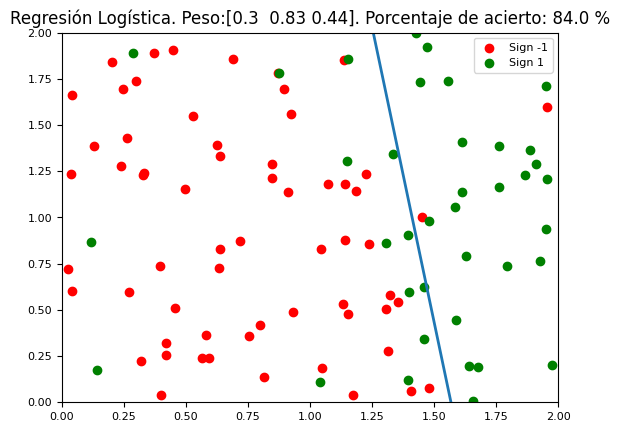

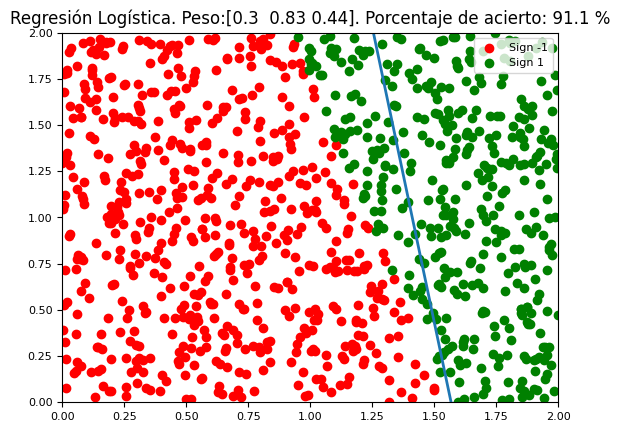

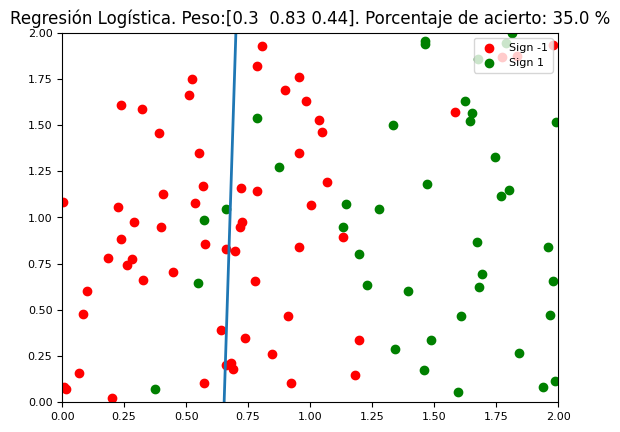

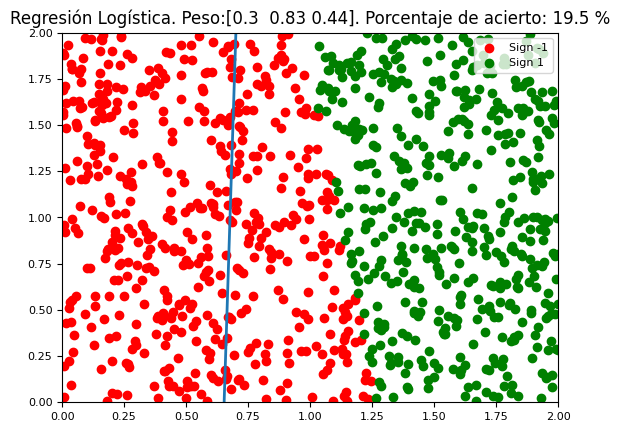

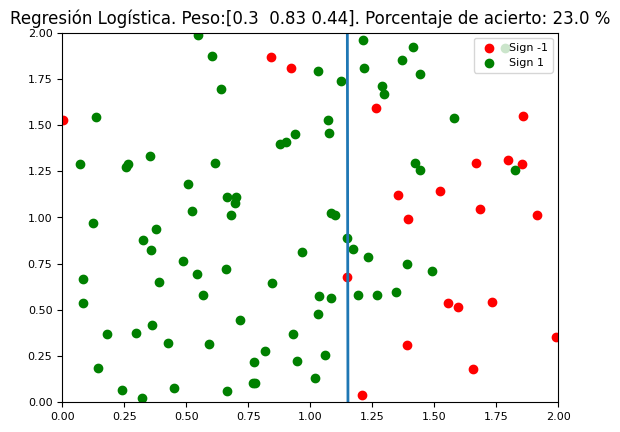

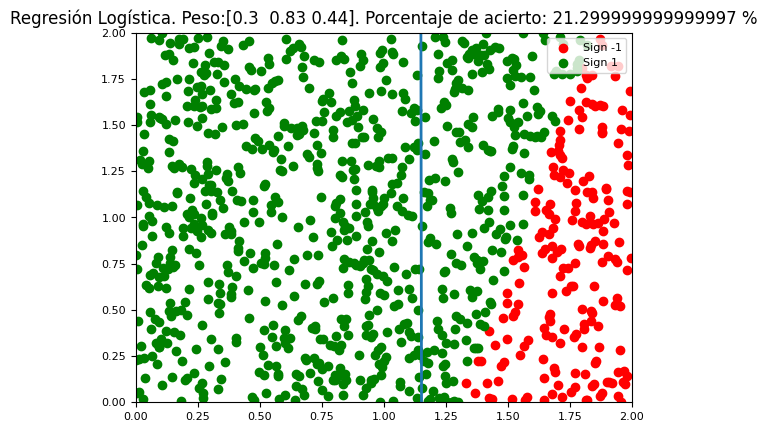

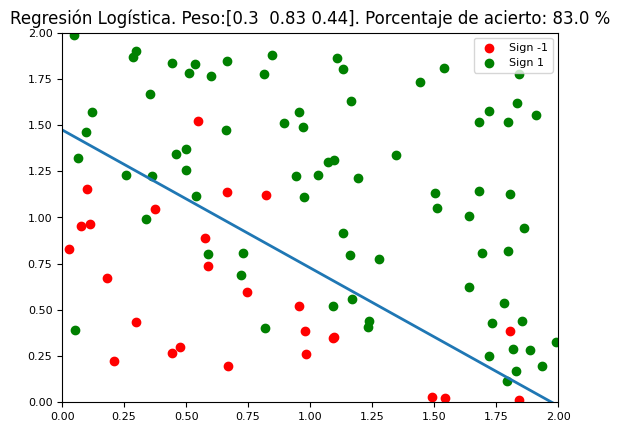

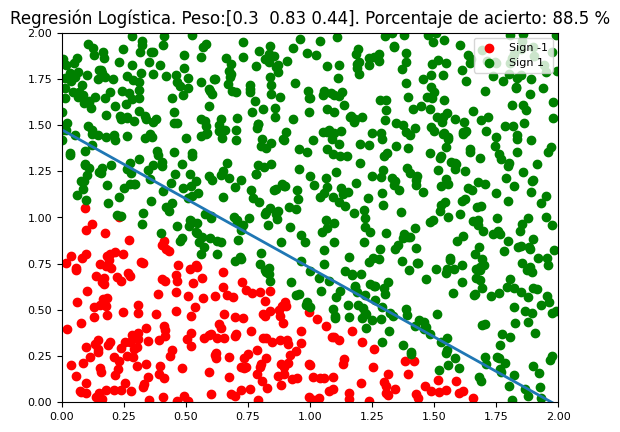

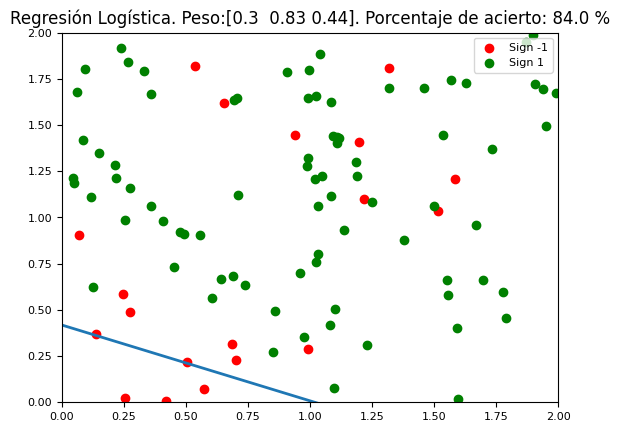

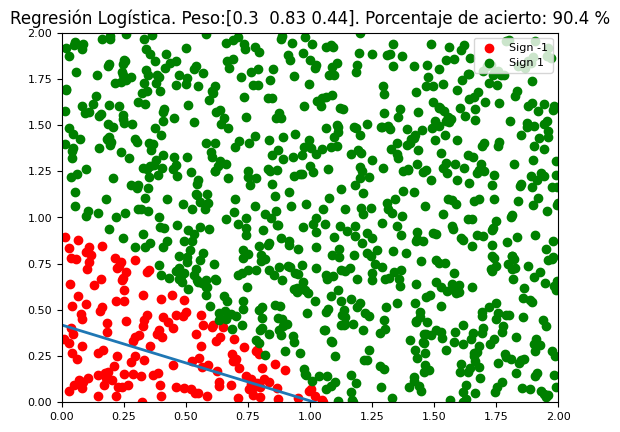

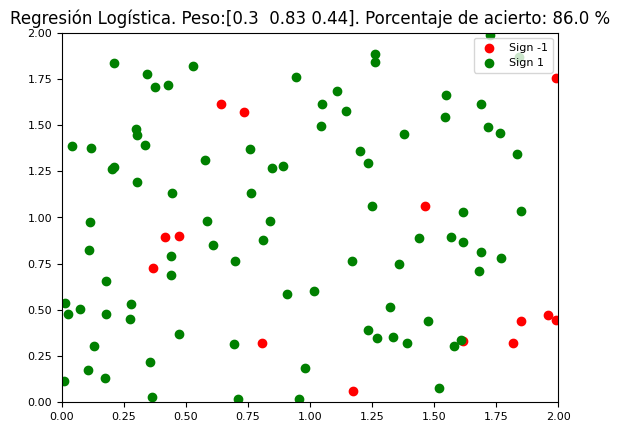

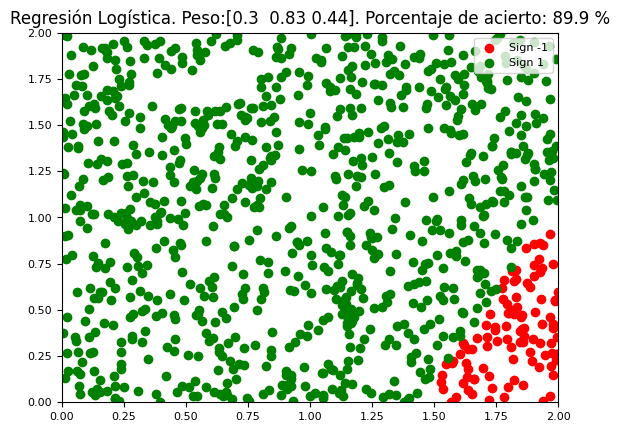

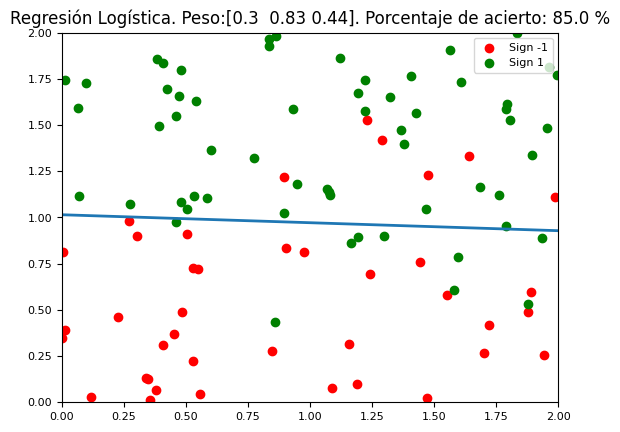

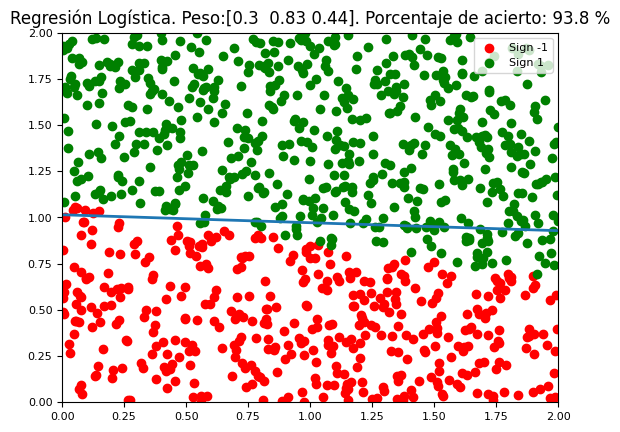

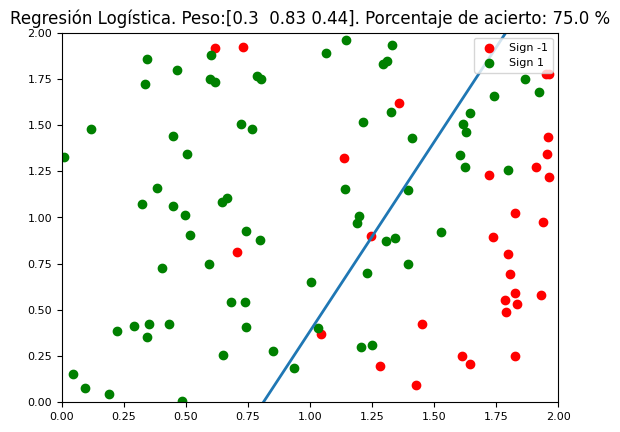

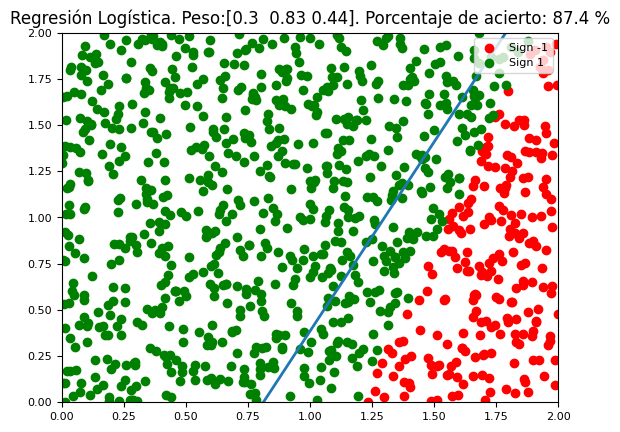

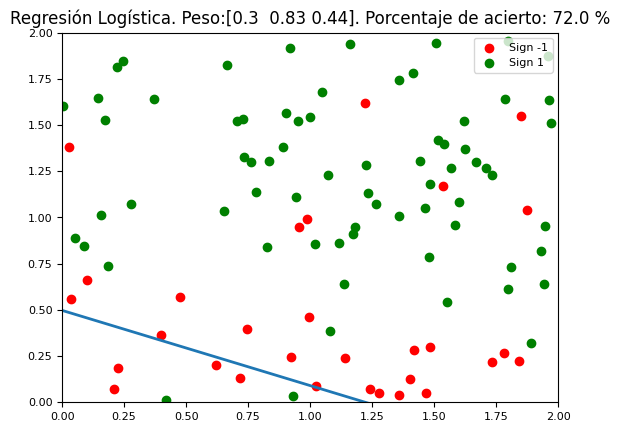

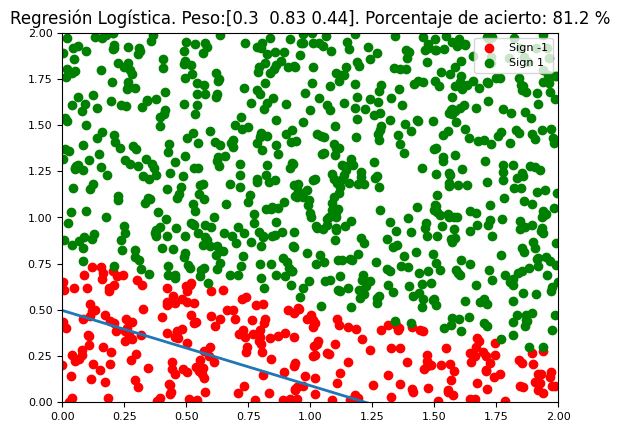

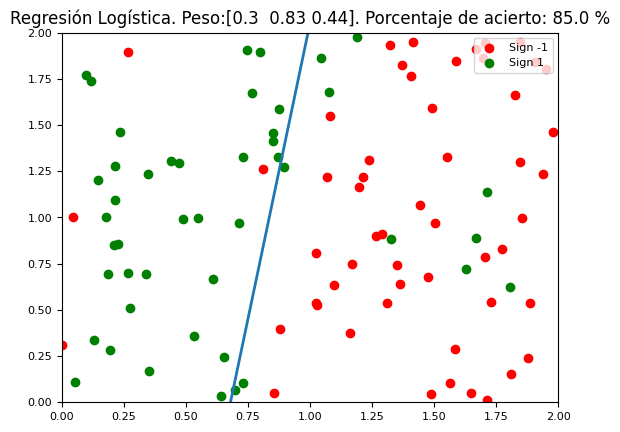

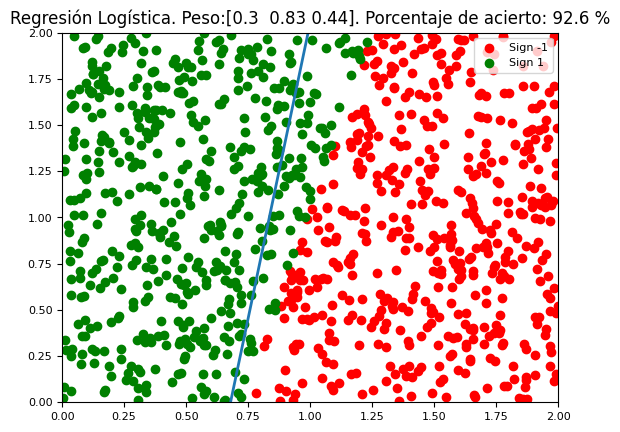

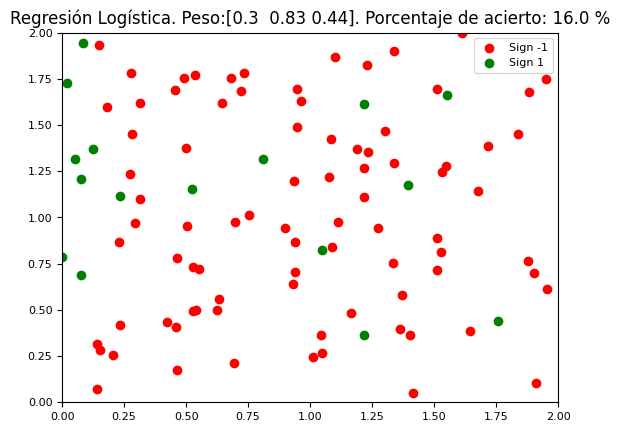

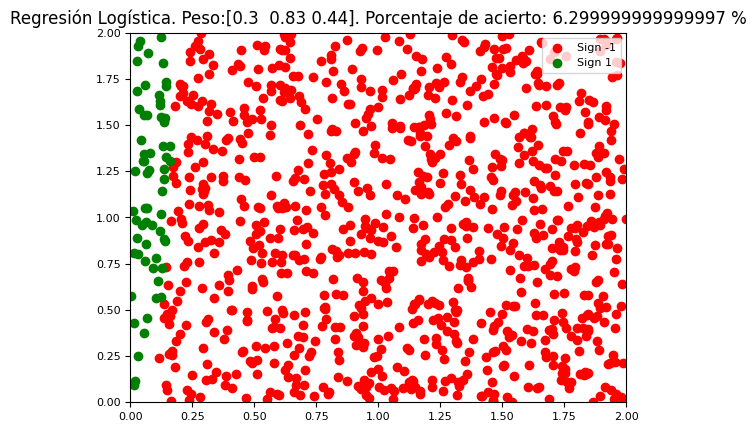

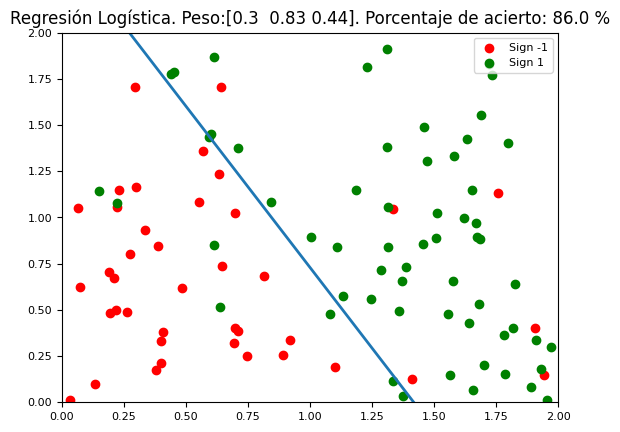

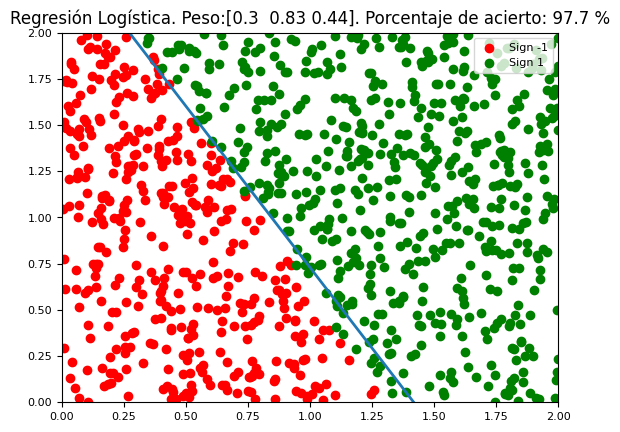

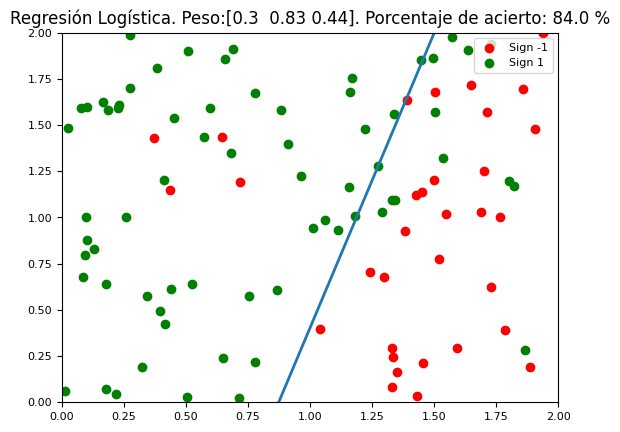

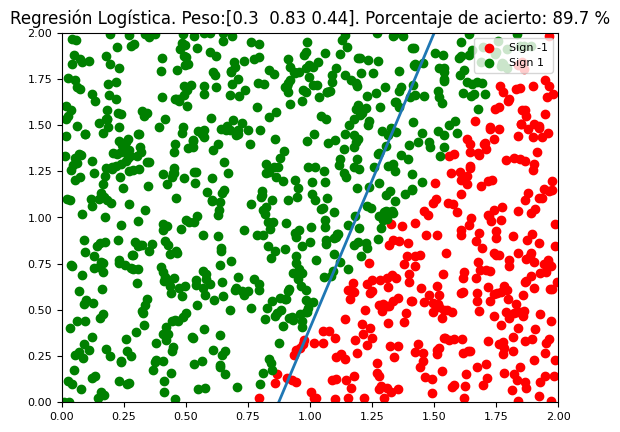

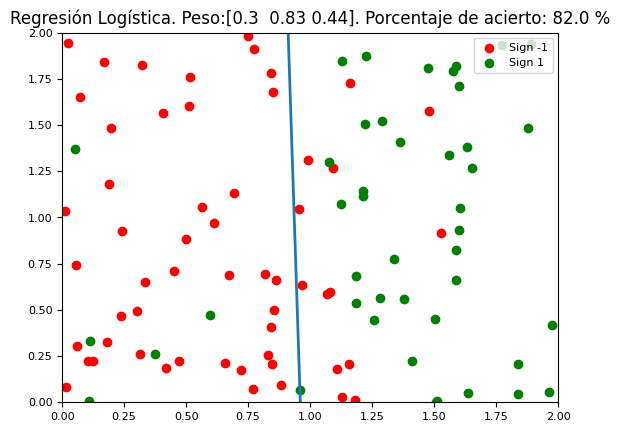

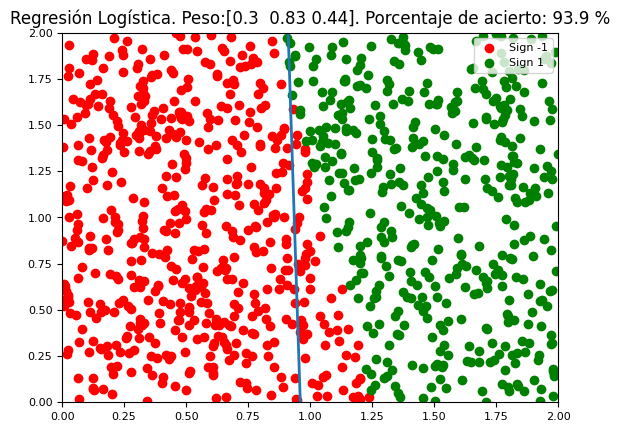

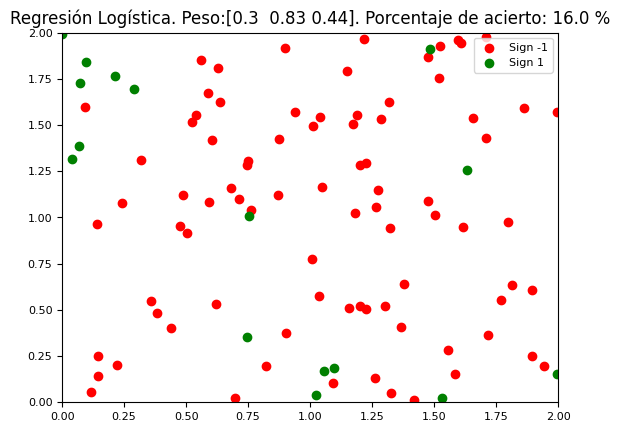

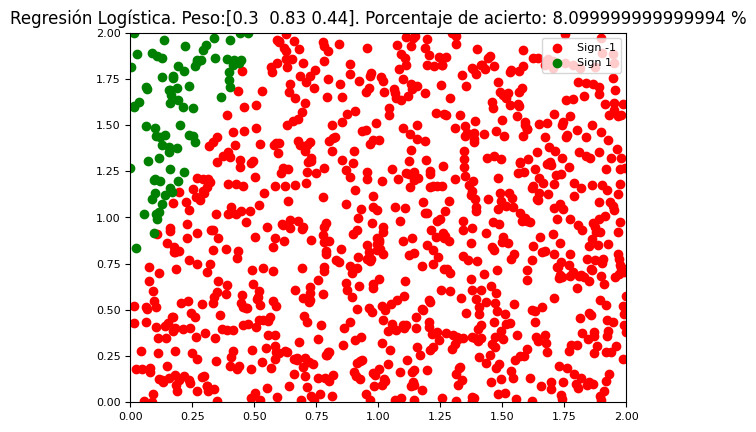

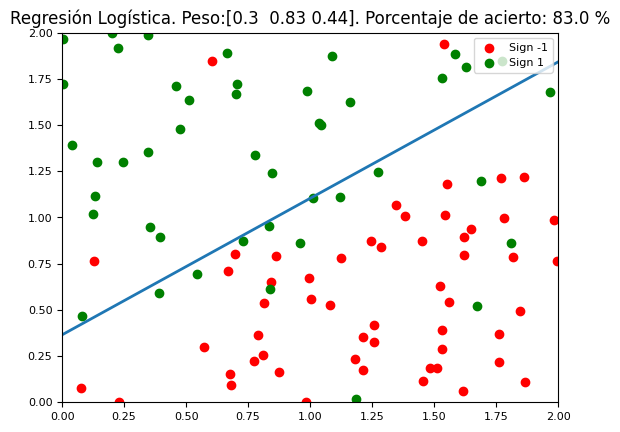

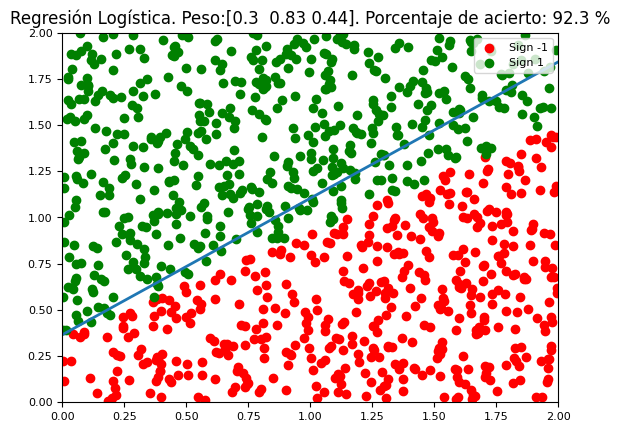

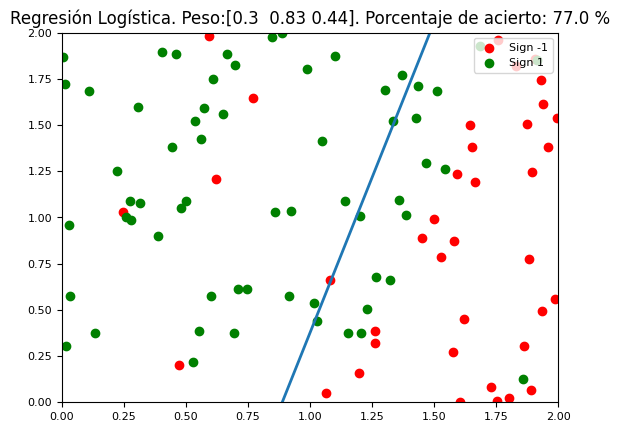

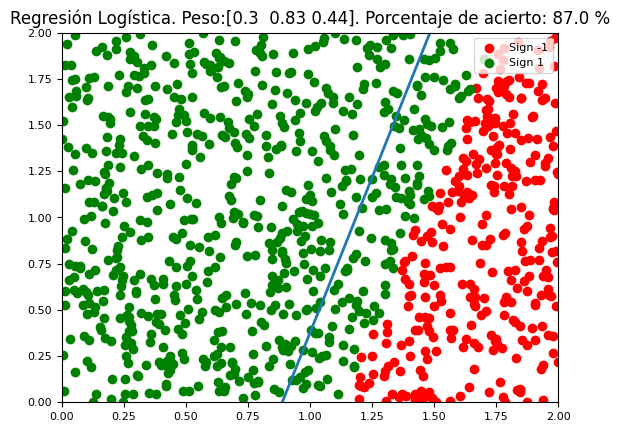

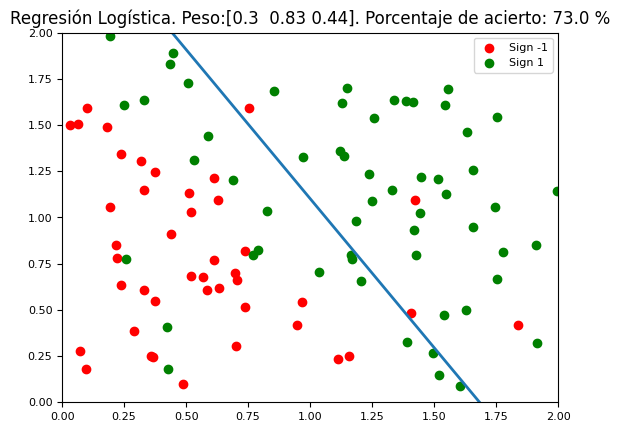

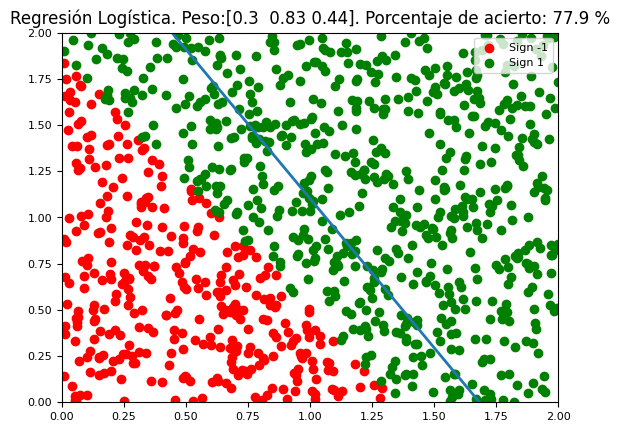

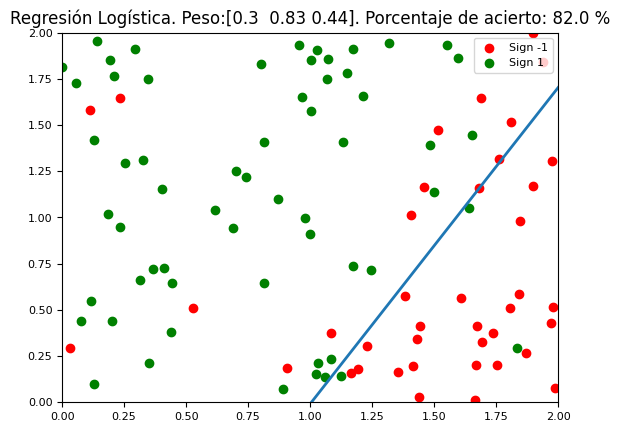

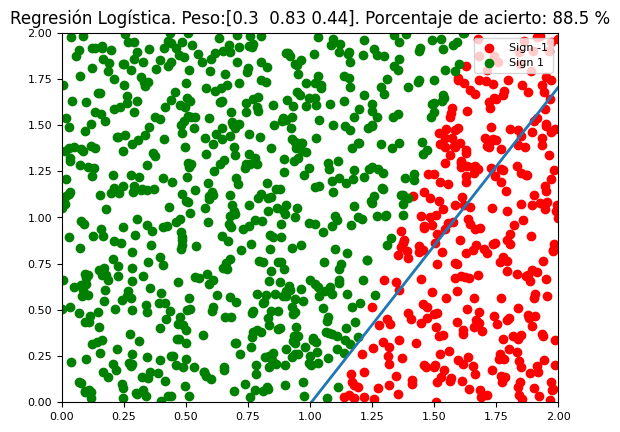

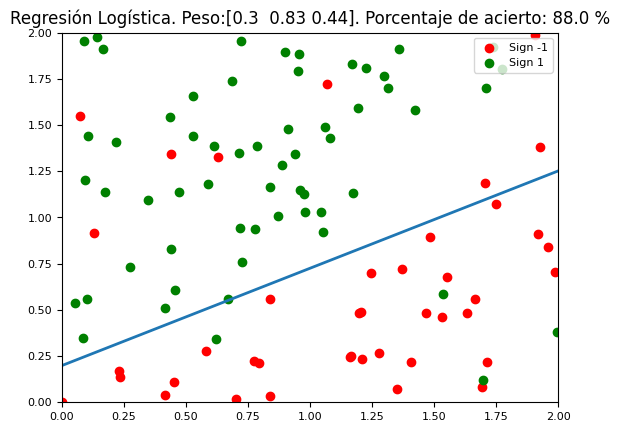

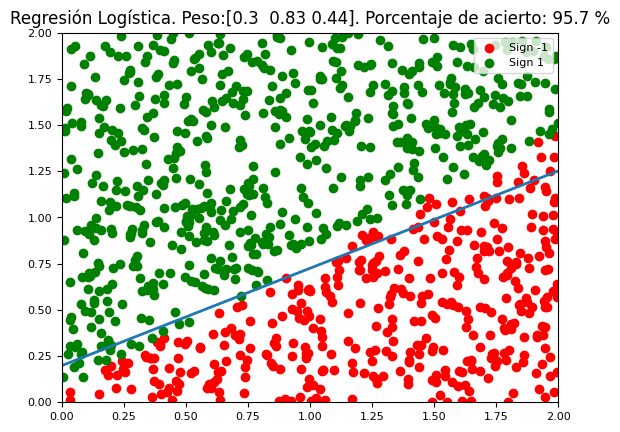

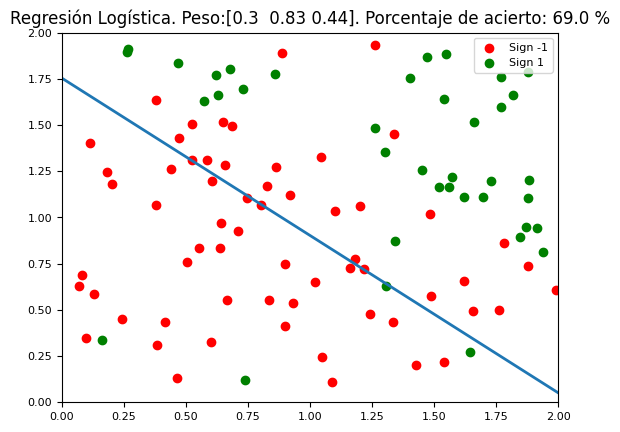

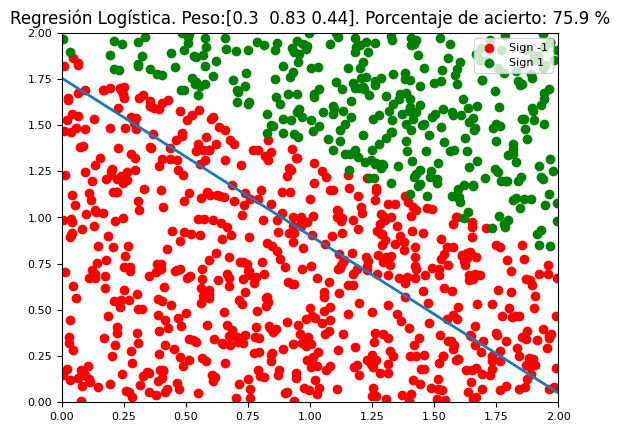

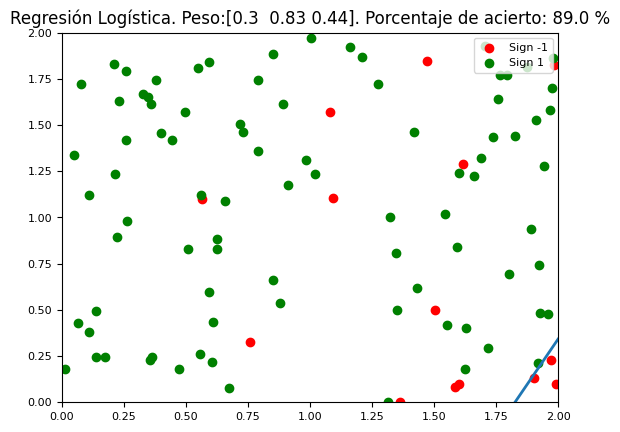

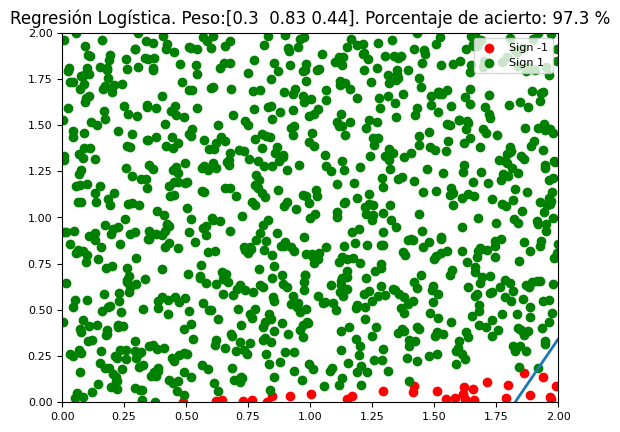

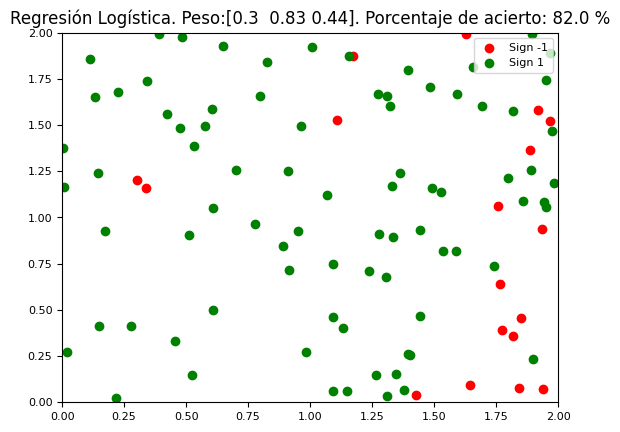

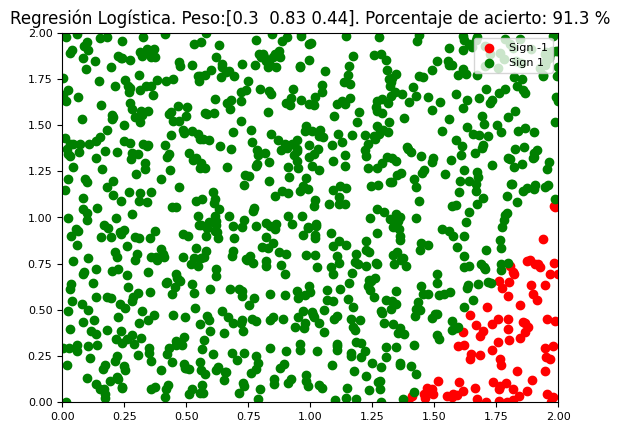

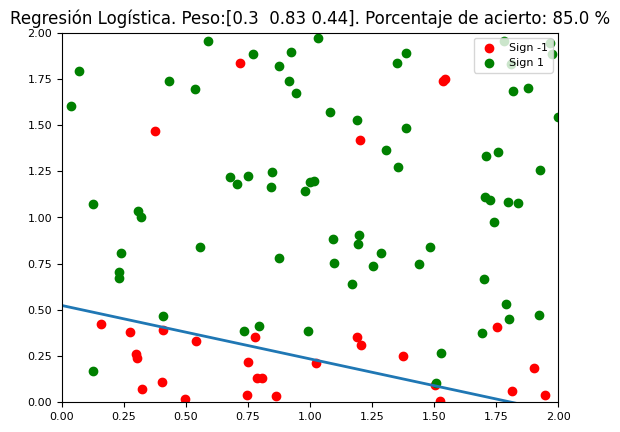

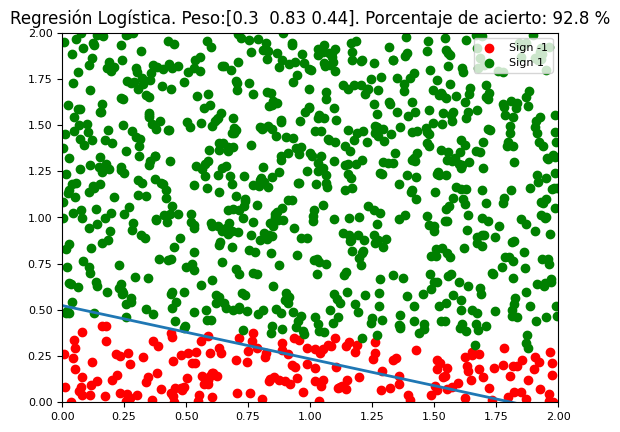

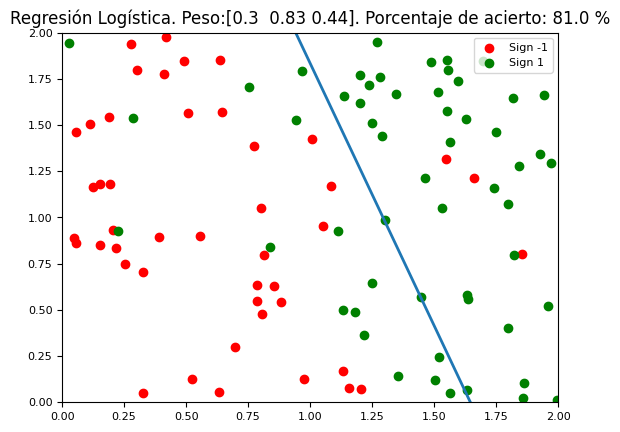

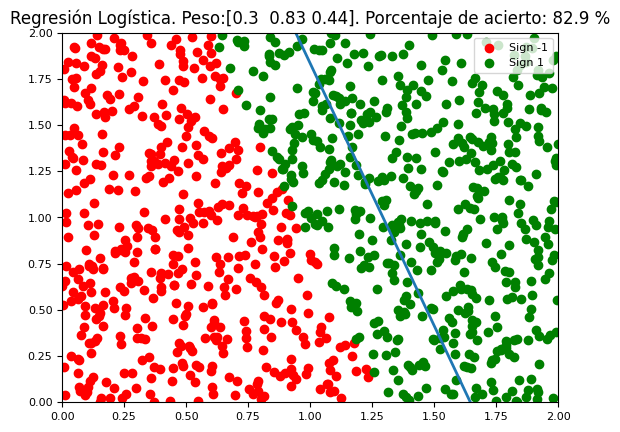

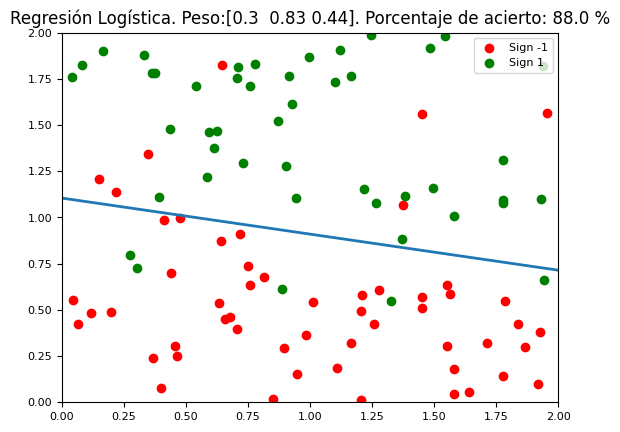

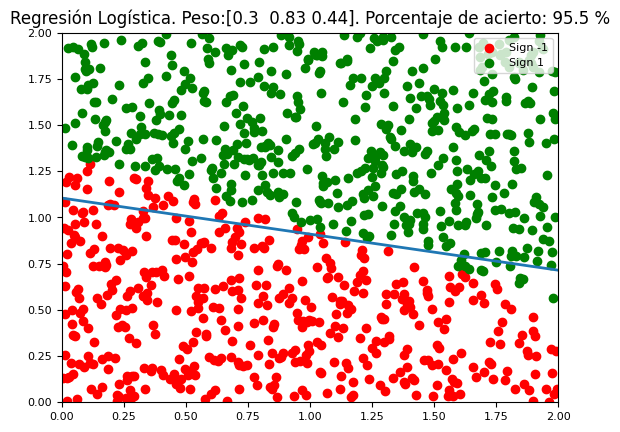

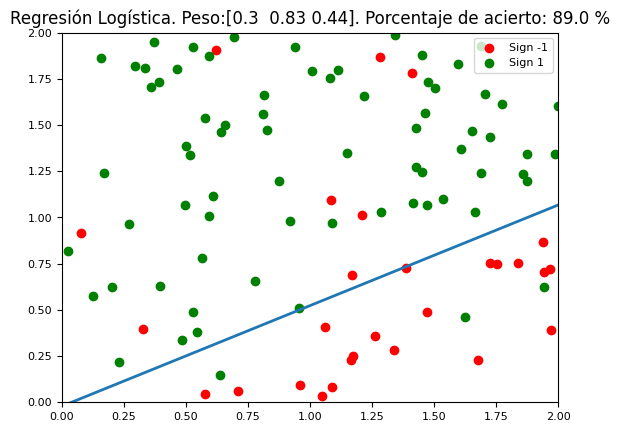

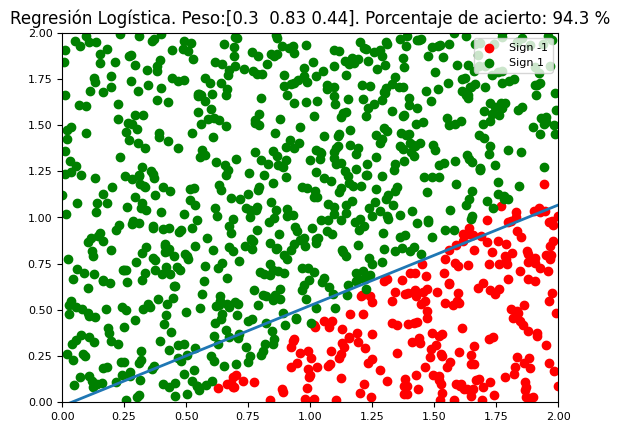

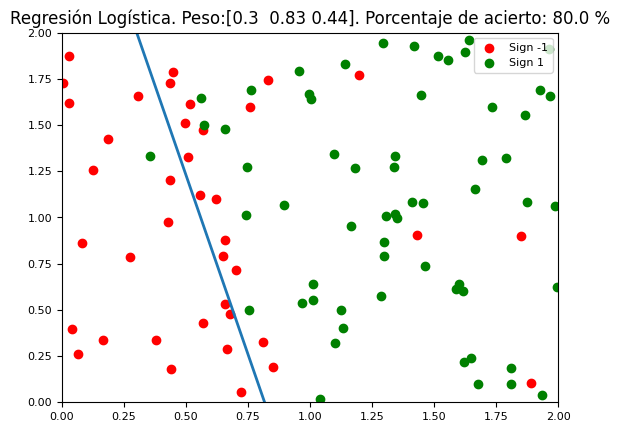

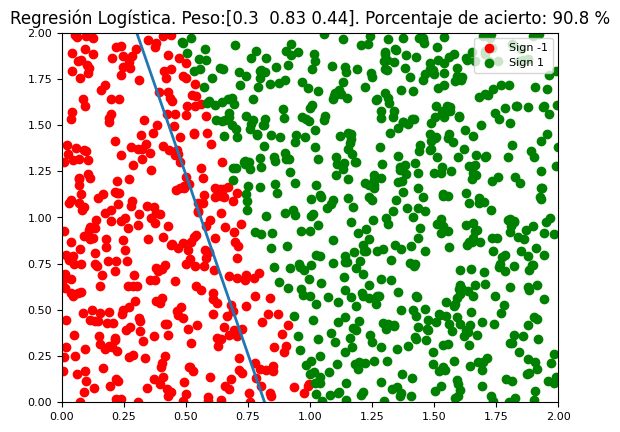

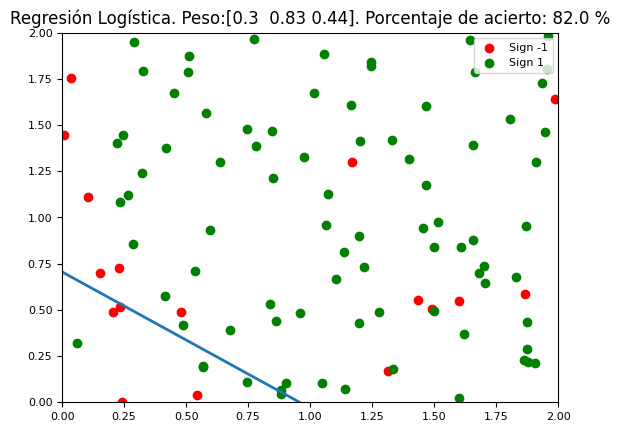

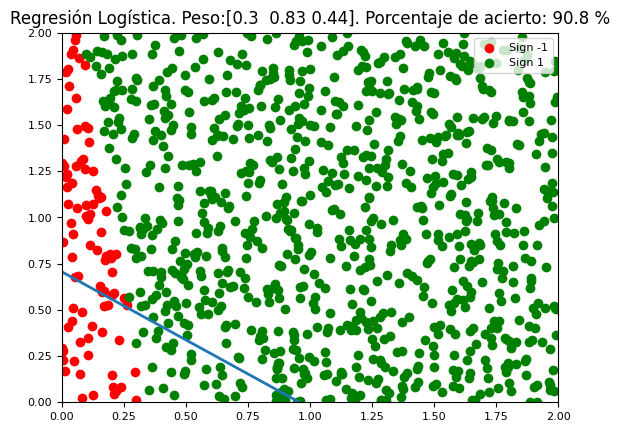

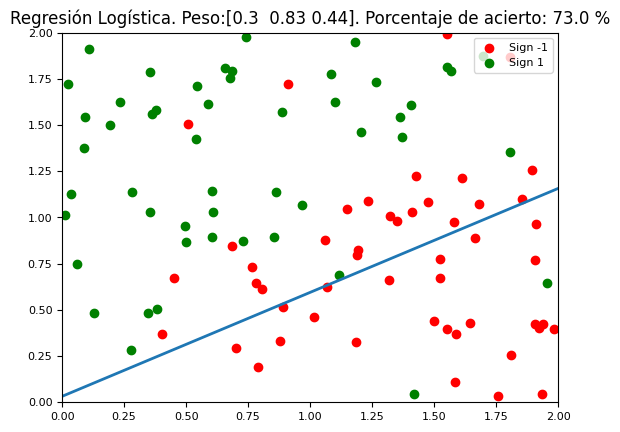

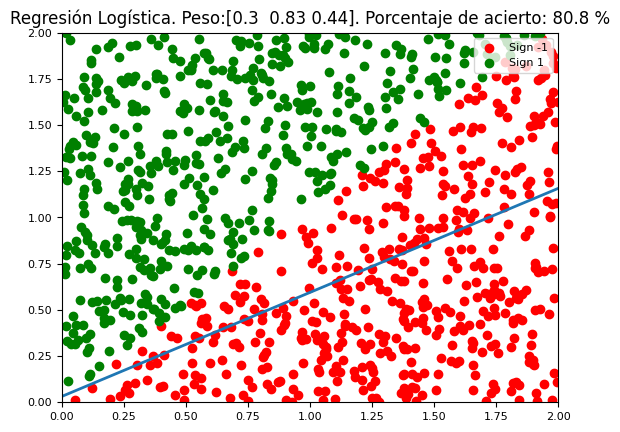

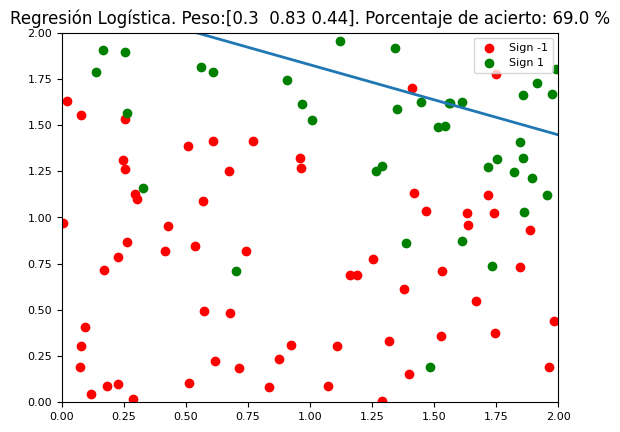

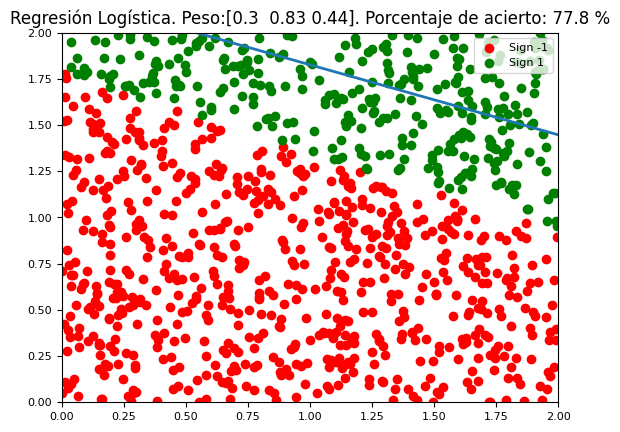

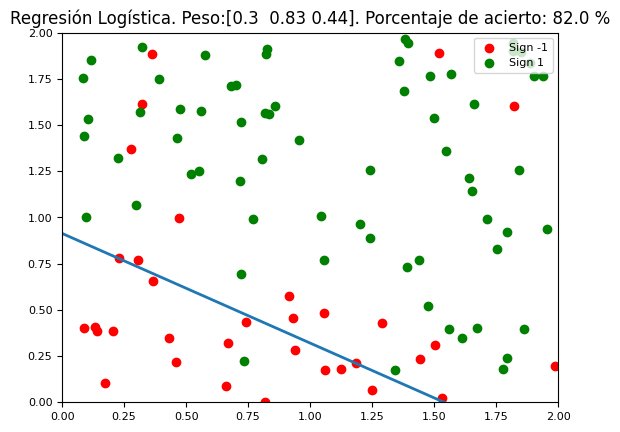

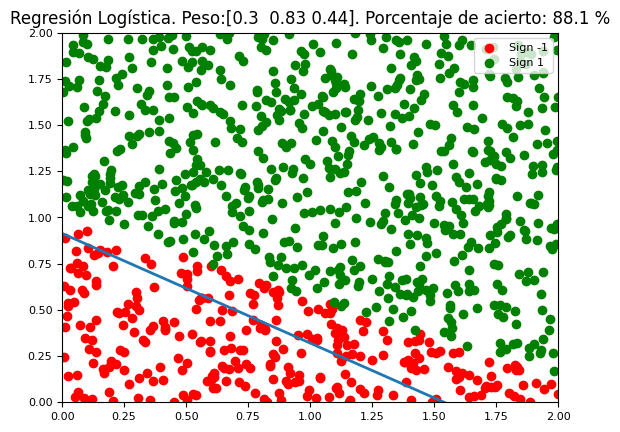

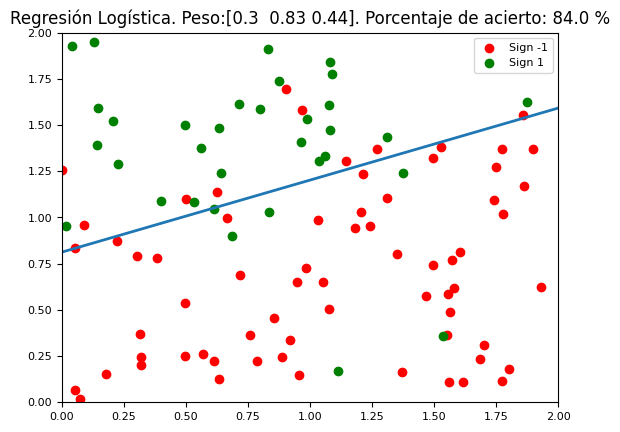

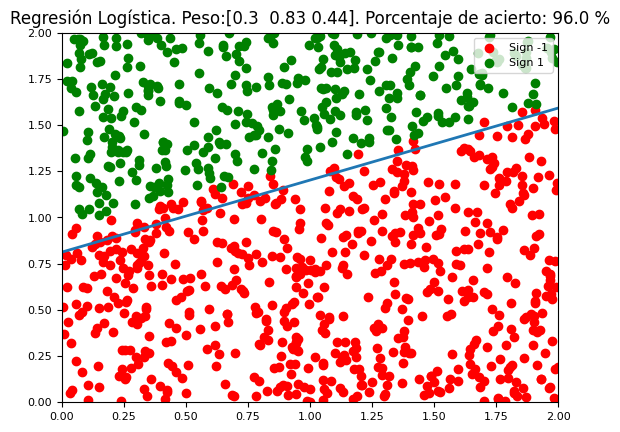

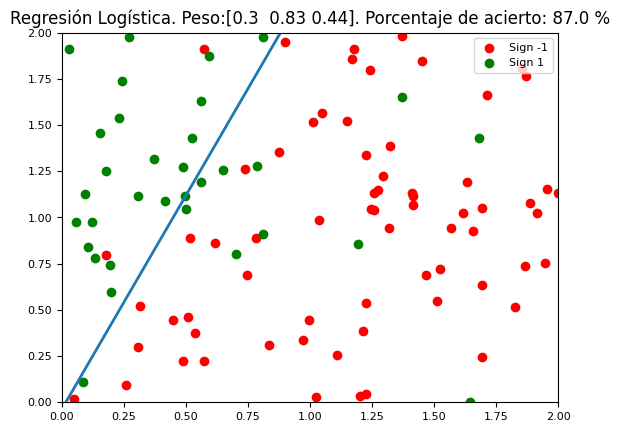

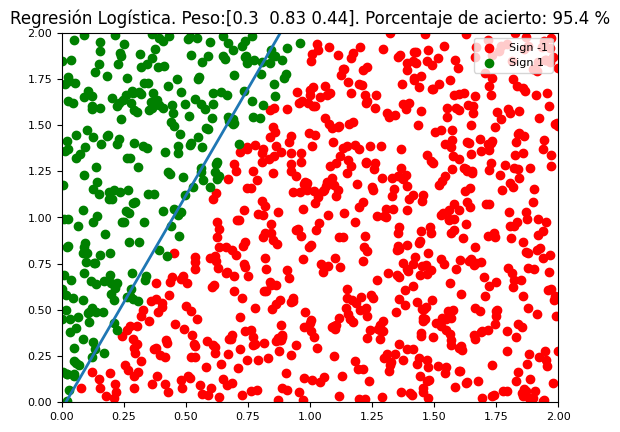

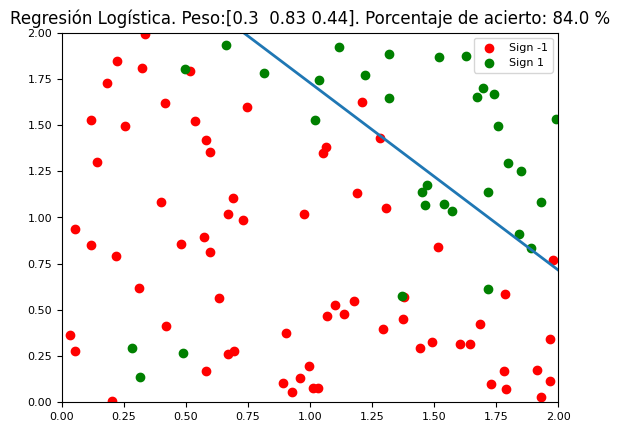

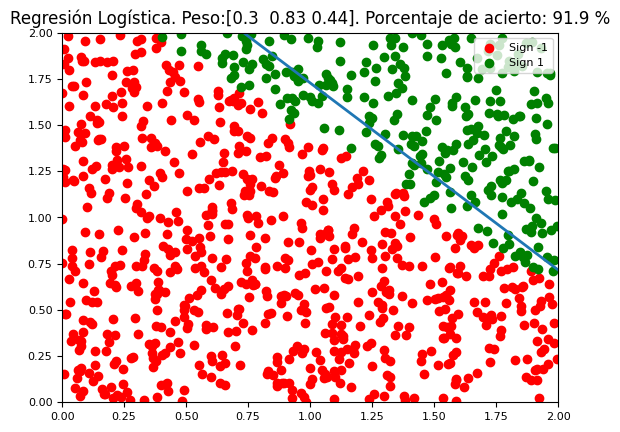

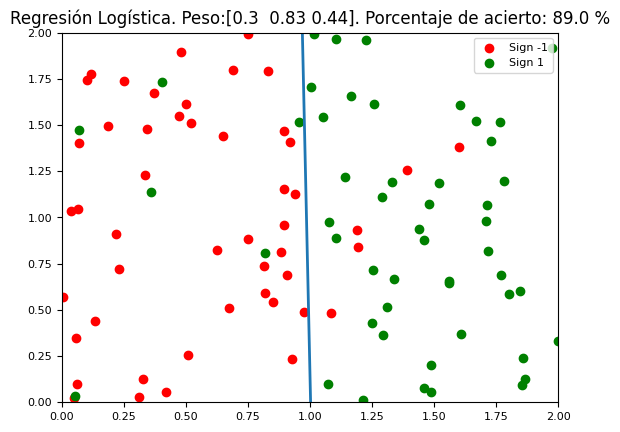

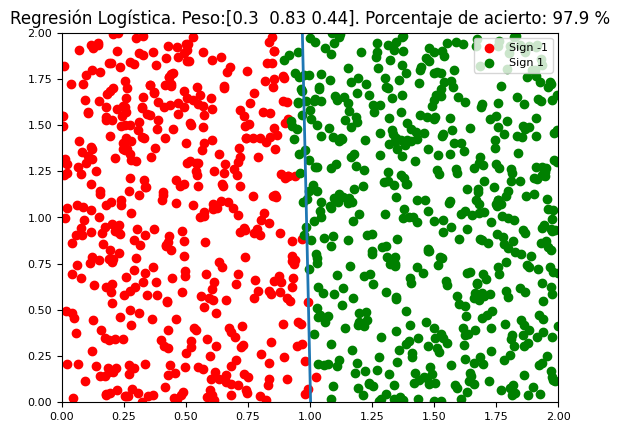

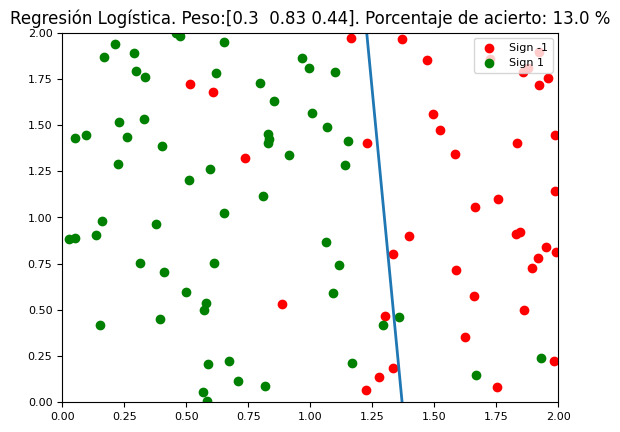

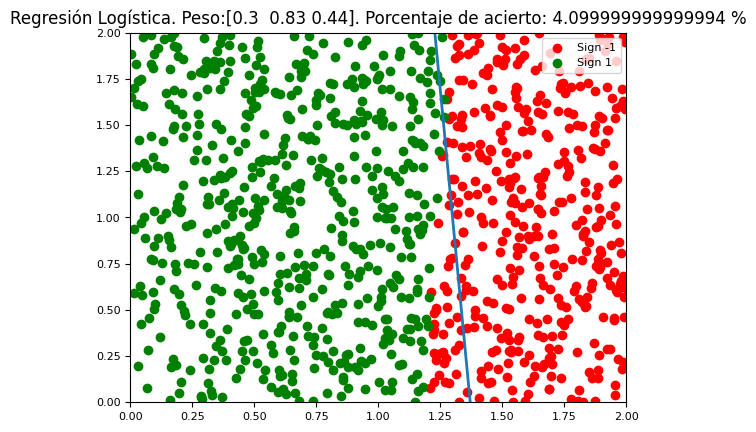

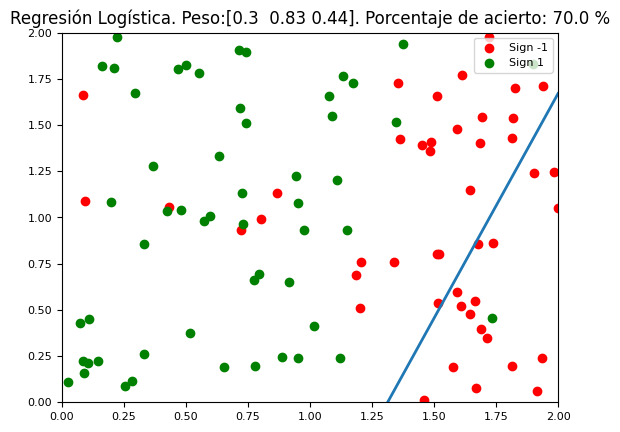

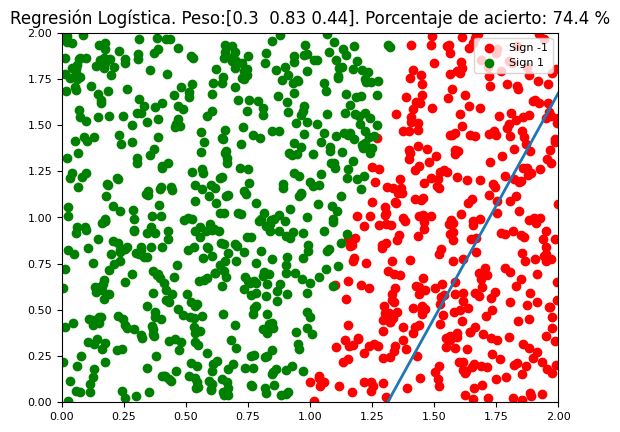

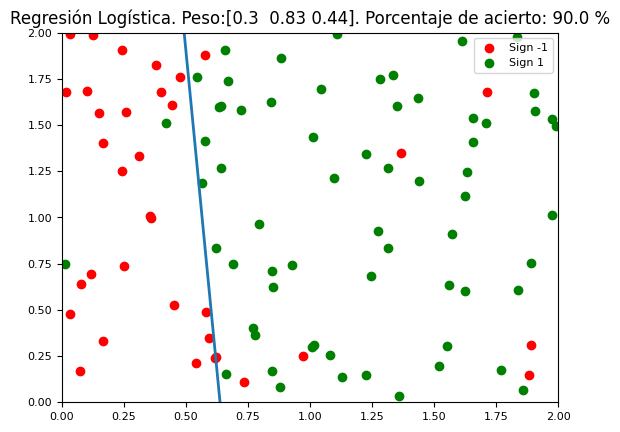

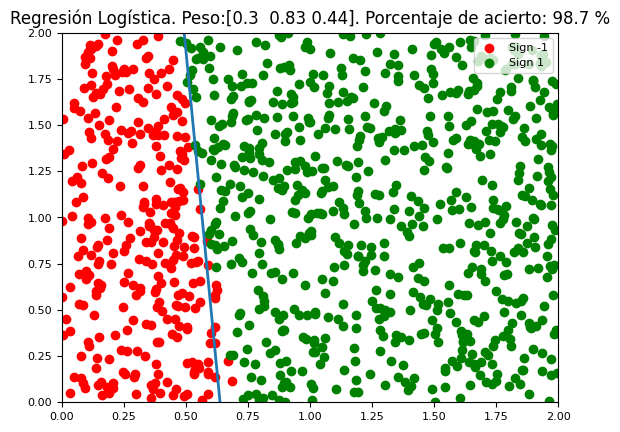

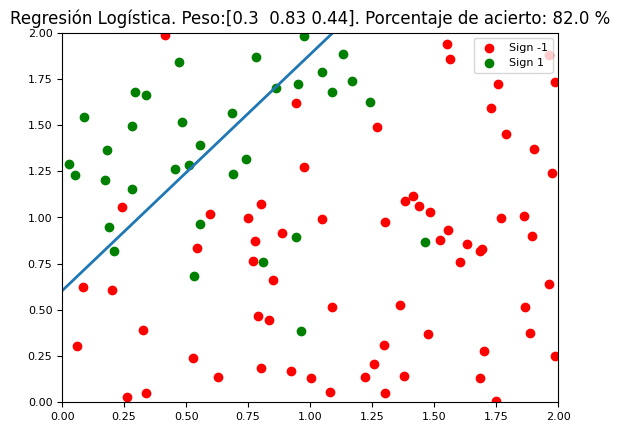

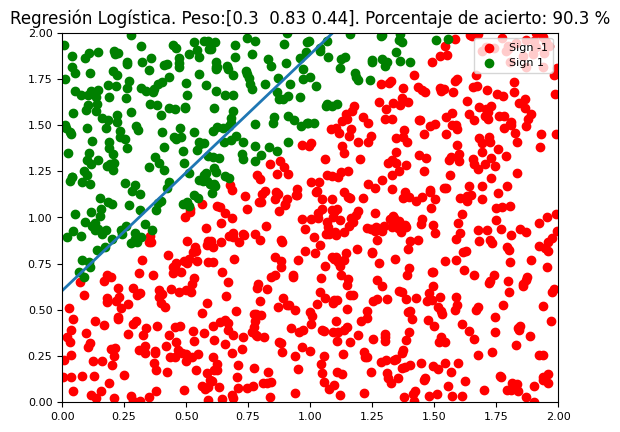

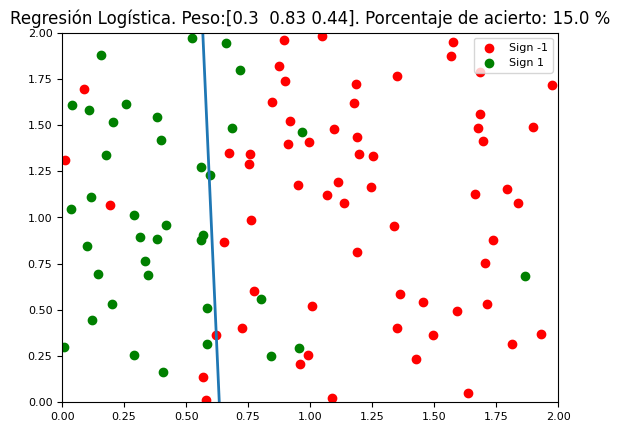

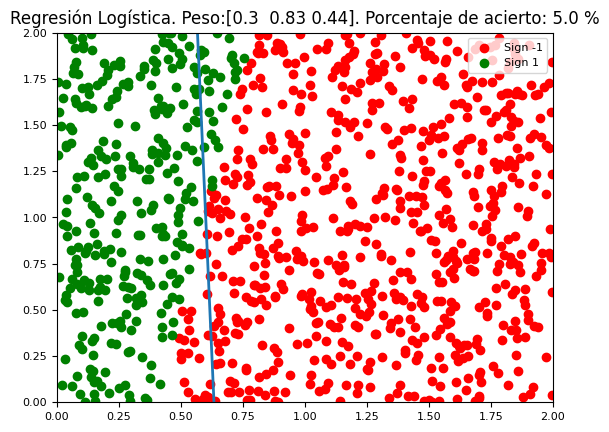

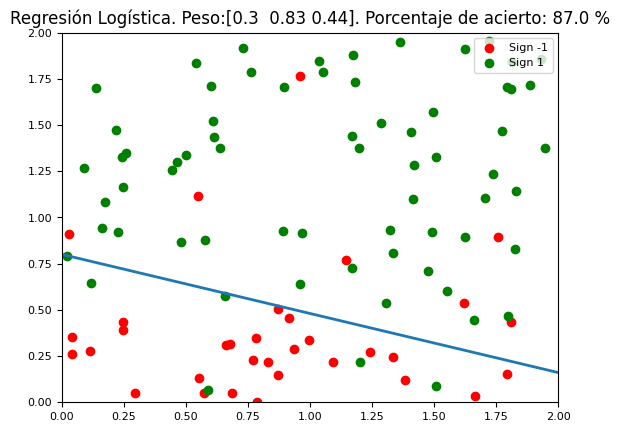

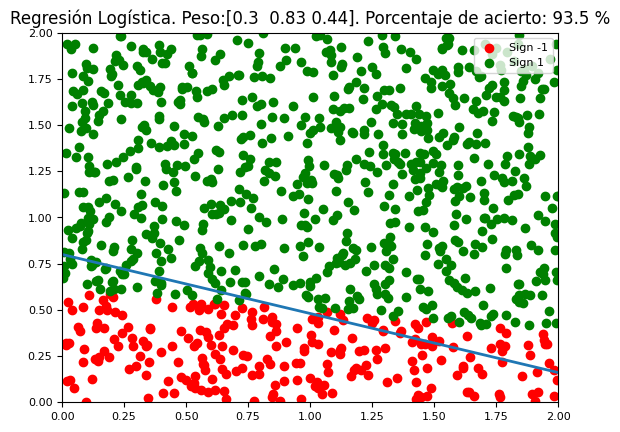

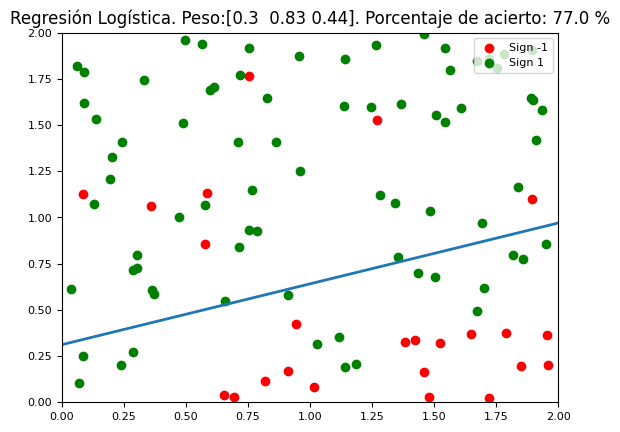

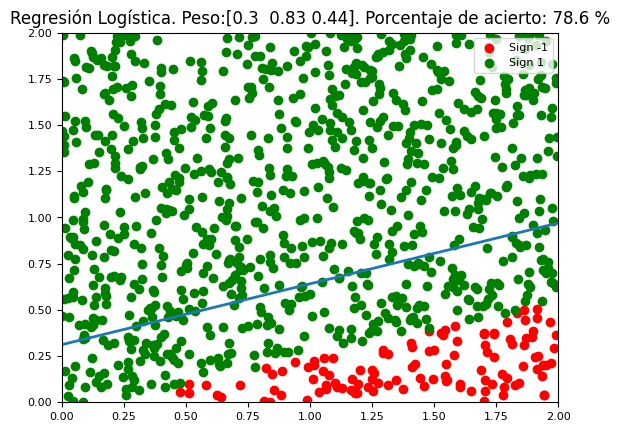

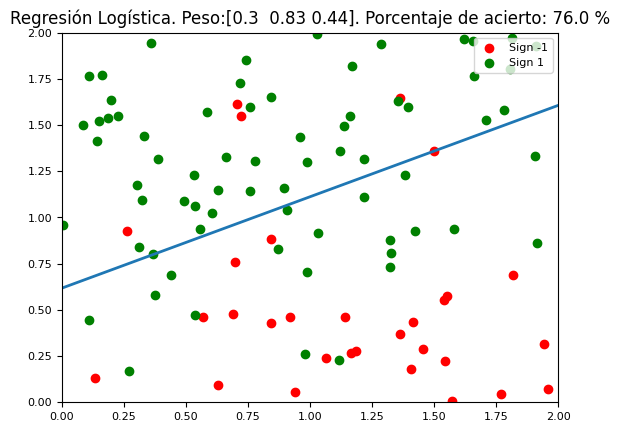

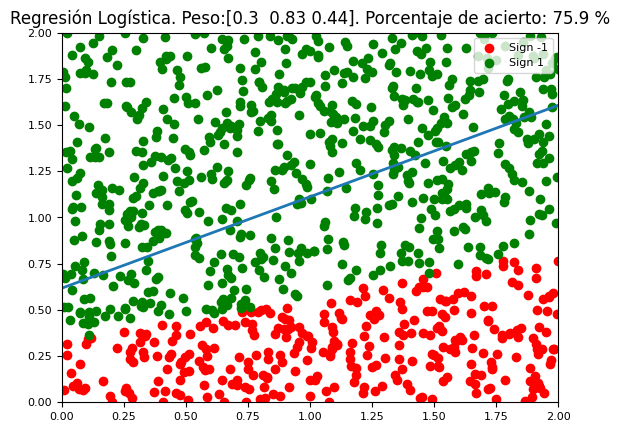

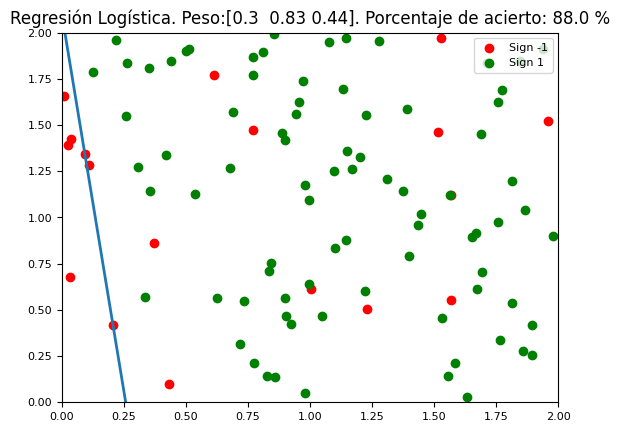

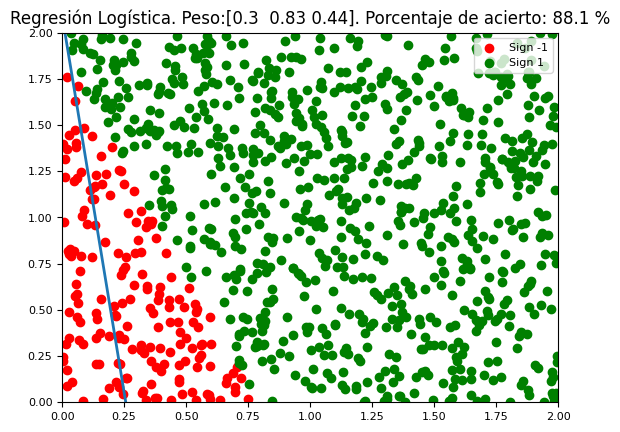

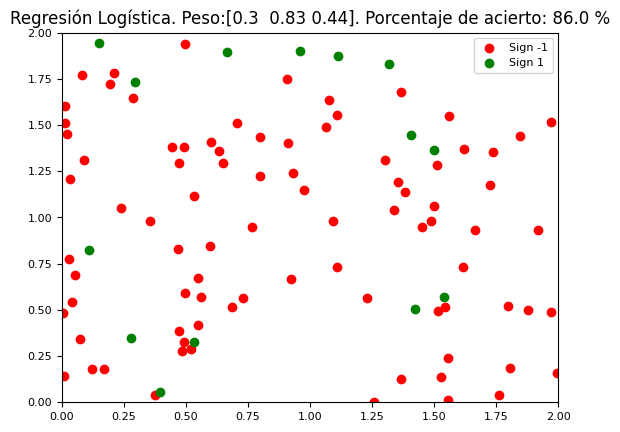

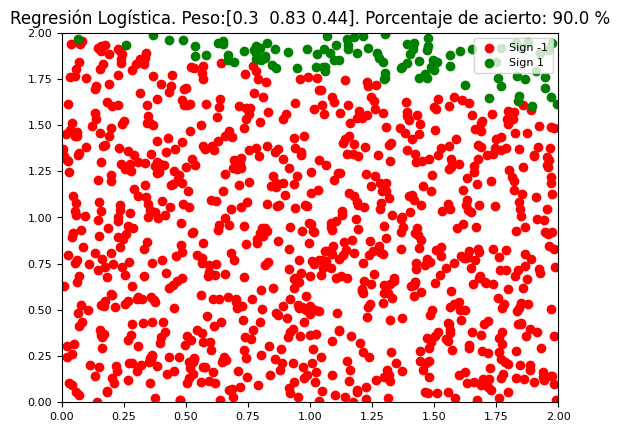

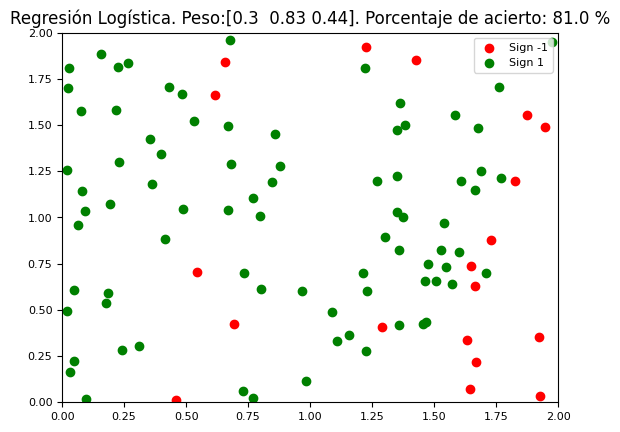

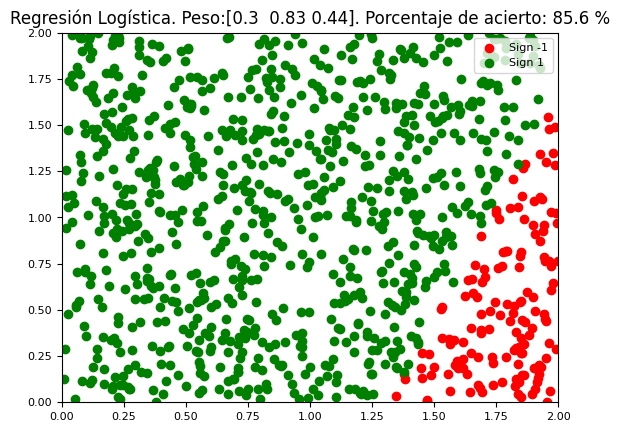

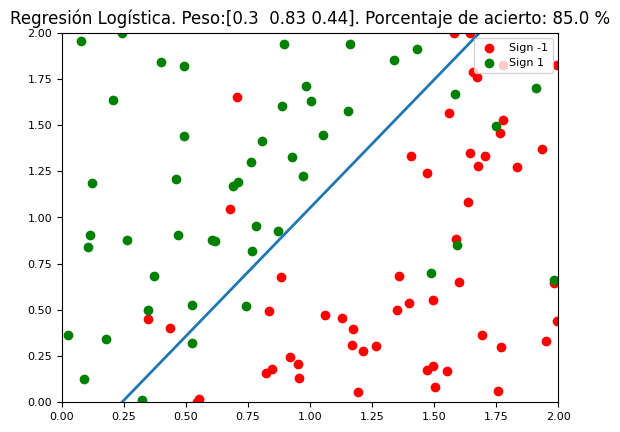

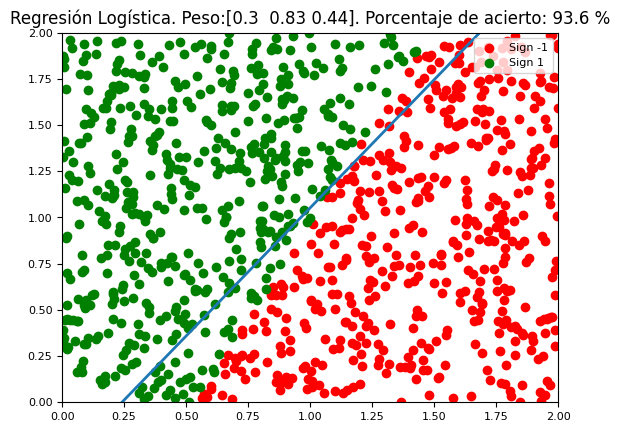

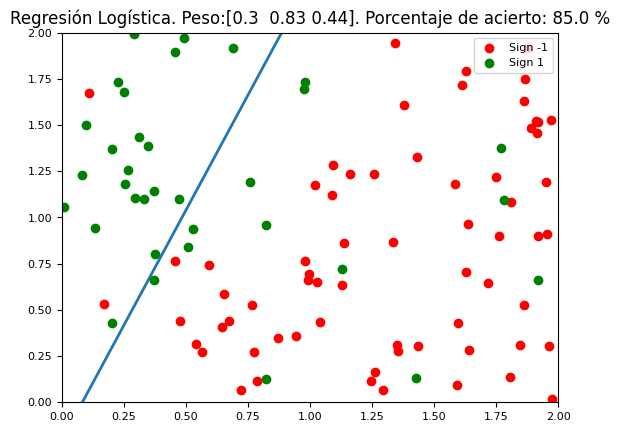

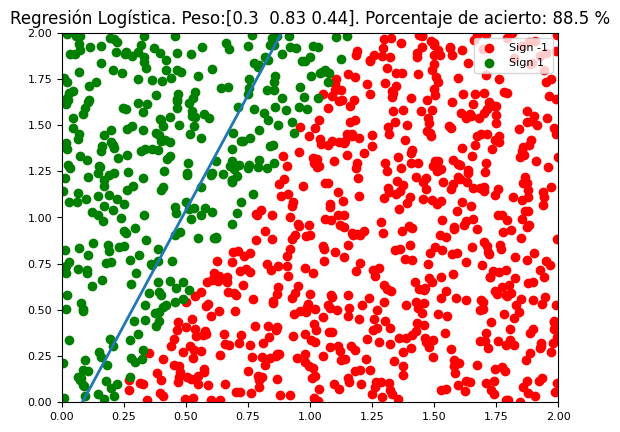

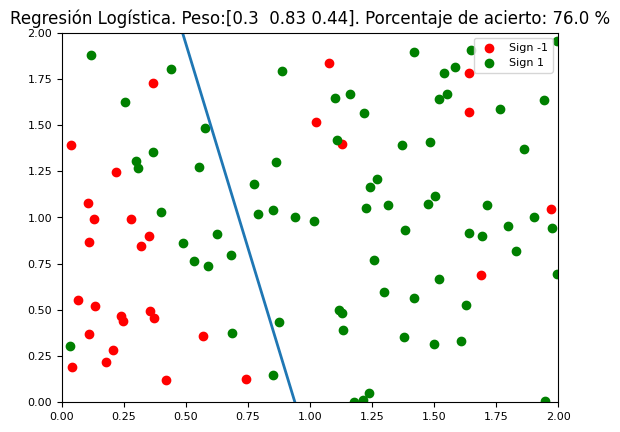

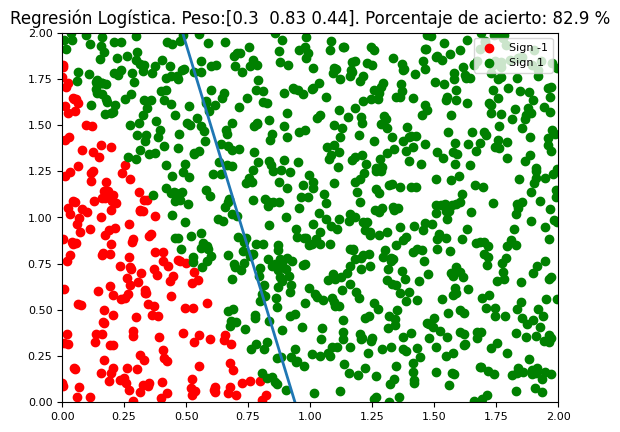

Iteraciones  Error in  Acierto train(%)  Error out  Acierto test(%)
0            11      0.46              84.0       0.23             91.1
1            13      0.96              35.0       0.46             19.5
2            14      0.49              23.0       0.41             21.3
3            23      0.37              83.0       0.24             88.5
4             8      0.46              84.0       0.24             90.4
5             9      0.62              86.0       0.35             89.9
6            19      0.38              85.0       0.16             93.8
7            16      0.49              75.0       0.24             87.4
8            18      1.19              72.0       0.47             81.2
9            11      0.48              85.0       0.22             92.6
10            6      0.57              16.0       0.17              6.3
11           15      0.40              86.0       0.22             97.7
12           11      0.46              84.0       0.26             89.7
13            9      0.46              82.0       0.23             93.9
14            6      0.50              16.0       0.21              8.1
15            7      0.40              83.0       0.24             92.3
16           17      0.57              77.0       0.23             87.0
17           19      0.49              73.0       0.38             77.9
18           16      0.52              82.0       0.24             88.5
19            6      0.48              88.0       0.21             95.7
20           18      0.76              69.0       0.46             75.9
21           10      0.36              89.0       0.22             97.3
22         1000      0.69              82.0       0.27             91.3
23            7      0.49              85.0       0.20             92.8
24           11      0.48              81.0       0.32             82.9
25           16      0.37              88.0       0.17             95.5
26            4      0.44              89.0       0.20             94.3
27           15      0.51              80.0       0.18             90.8
28            8      0.44              82.0       0.26             90.8
29            8      0.73              73.0       0.48             80.8
30           20      0.84              69.0       0.43             77.8
31            9      0.53              82.0       0.22             88.1
32           13      0.40              84.0       0.21             96.0
33            7      0.46              87.0       0.15             95.4
34           16      0.57              84.0       0.16             91.9
35           14      0.43              89.0       0.15             97.9
36           23      0.33              13.0       0.17              4.1
37           15      0.78              70.0       0.45             74.4
38            8      0.45              90.0       0.23             98.7
39           11      0.44              82.0       0.21             90.3
40           11      0.40              15.0       0.19              5.0
41           12      0.36              87.0       0.19             93.5
42            4      0.45              77.0       0.38             78.6
43            9      0.54              76.0       0.45             75.9
44           10      0.45              88.0       0.26             88.1
45           10      0.48              86.0       0.36             90.0
46           17      0.60              81.0       0.30             85.6
47            9      0.43              85.0       0.19             93.6
48            5      0.44              85.0       0.26             88.5
49            7      0.51              76.0       0.38             82.9

Media Epocas  Error in medio  Acierto train Medio(%)  Error out medio  \
0         31.62            0.52                   74.46             0.27   

   Acierto test Medio(%)  
0                  79.63

In [24]:
np.random.seed(0)
N = 50
resultados, resultados_medios = [], []

for i in range(N):
    # Guardar resultados
    epocas, Ein, pacierto_train, Eout, pacierto_test = experimentarRL(True, True, True) #El criterio de parada pasa a ser las iteraciones
    resultados.append([epocas, Ein, pacierto_train, Eout, pacierto_test])

labelDatos = ['Iteraciones', 'Error in', 'Acierto train(%)', 'Error out', 'Acierto test(%)']
labelDatosMedios = ['Media Epocas', 'Error in medio', 'Acierto train Medio(%)', 'Error out medio', 'Acierto test Medio(%)']
generarTablas(labelDatos, labelDatosMedios)



---

## <font color='blue'> Bonus (1.5 puntos). Clasificación de dígitos.

El BONUS solo se tendrá en cuenta si se ha obtenido al menos el 75\% de los puntos de la
parte obligatoria.</font>

<font color='blue'>Considerar el conjunto de datos de dígitos manuscritos, y seleccionar las muestras de los dígitos 4 y 8. Extraer las características de intensidad promedio y simetría en la manera que se indicó en la práctica anterior.
</font>

<font color='blue'> 1) Plantear un problema de clasificación binaria que considere el conjunto de entrenamiento
como datos de entrada para aprender la función $g$.

<font color='blue'> 2) Compárense los modelos de regresión lineal, PLA, RL y PLA-Pocket. 

> <font color='blue'> a) Generar gráficos separados de los datos de entrenamiento y test junto con
la función estimada.

> <font color='blue'> b) Calcular $E_{in}$ y $E_{test}$ (error sobre los datos de test).

> <font color='blue'> c) Si se emplean los pesos obtenidos con regresión lineal para inicializar los otros tres métodos (RL, PLA, PLA-pocket), ¿se observa alguna mejora en los resultados a algún nivel? Justifique su respuesta.

> <font color='blue'> d) Obtener cotas sobre el verdadero valor de $E_{out}$ para los cuatro métodos empleados. Calcúlense dos cotas: una
basada en $E_{in}$ y otra basada en $E_{test}$. Usar una tolerancia $\delta = 0.05$. ¿Qué cota es
mejor? Justifique la respuesta.  


In [25]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta datos (que contiene X_train.npy, y_train.npy, X_test.npy y y_test.npy) 
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Funcion para leer los datos
def readData(file_x, file_y, class1, class2, label_class1, label_class2):
    # Leemos los ficheros    
    datax = np.load(file_x)
    datay = np.load(file_y)
    y = []
    x = []    
    # Solo guardamos los datos de las dos clases que nos interesan
    for i in range(0,datay.size):
        if datay[i] == class1 or datay[i] == class2:
            if datay[i] == class1:
                y.append(label_class1)
            else:
                y.append(label_class2)
            x.append(np.array([1, datax[i][0], datax[i][1]]))
            
    x = np.array(x, np.float64)
    y = np.array(y, np.float64)
    
    return x, y

In [27]:
class1 = 8 #dígito 8
class2 = 4 #dígito 4
label1 = 1 #etiqueta empleada para representar class1
label2 = -1 #etiqueta empleada para representar class2
# Lectura de los datos de entrenamiento 
# x, y = readData('drive/MyDrive/Colab Notebooks/datos/X_train.npy', 
#                 'drive/MyDrive/Colab Notebooks/datos/y_train.npy', class1, class2, label1, label2)
# # Lectura de los datos para el test
# x_test, y_test = readData('drive/MyDrive/Colab Notebooks/datos/X_test.npy', 
#                          'drive/MyDrive/Colab Notebooks/datos/y_test.npy', class1, class2, label1, label2)

Sin hacer